In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
path_prefix = '../cs5228-2310-final-project/'
df_train = pd.read_csv(path_prefix + 'train.csv')
df_test = pd.read_csv(path_prefix + 'test.csv')

In [1]:
def category_map(df_origin, df_train_):
    df = df_origin.copy()
    df_train_ = df_train_.copy()

    colums = ['town', 'block', 'street_name', 'flat_type', 'flat_type2',
              'lease_commence_date', 'flat_model', 'subzone', 'planning_area','region']
    
    #locations = ['town', 'block', 'street_name', 'subzone', 'planning_area','region', 'cluster']
    
    for col in colums:
        group_mean = df_train_.groupby(col)['monthly_rent'].mean()
        group_std = df_train_.groupby(col)['monthly_rent'].std()
        group_median = df_train_.groupby(col)['monthly_rent'].median()
        cat_map = group_mean.index
        mean_dict = {cat_map[i]:group_mean[cat_map[i]] for i in range(len(cat_map))}
        std_dict = {cat_map[i]:group_std[cat_map[i]] for i in range(len(cat_map))}
        median_dict = {cat_map[i]:group_median[cat_map[i]] for i in range(len(cat_map))}
        df[col+'_std'] = df[col].apply(lambda x: std_dict[x] if x in cat_map else 0)
        df[col+'_mean'] = df[col].apply(lambda x: mean_dict[x] if x in cat_map else df_train_['monthly_rent'].mean())
        df[col+'_median'] = df[col].apply(lambda x: median_dict[x] if x in cat_map else -1)

        #df.drop(columns=[col], inplace=True)
        

    return df

In [4]:
df_train.head()

rent_approval_date             town block            street_name  flat_type  \
0            2021-09      jurong east   257  Jurong East Street 24     3 room   
1            2022-05            bedok   119       bedok north road     4-room   
2            2022-10        toa payoh   157     lorong 1 toa payoh     3-room   
3            2021-08        pasir ris   250    Pasir Ris Street 21  executive   
4            2022-11  kallang/whampoa    34           Whampoa West     3-room   

       flat_model  floor_area_sqm furnished  lease_commence_date  latitude  \
0  new generation            67.0       yes                 1983  1.344518   
1  new generation            92.0       yes                 1978  1.330186   
2        improved            67.0       yes                 1971  1.332242   
3       apartment           149.0       yes                 1993  1.370239   
4        improved            68.0       yes                 1972  1.320502   

    longitude  elevation            subzone planning_area          region  \
0  103.738630        0.0         yuhua east   jurong east     west region   
1  103.938717        0.0        bedok north         bedok     east region   
2  103.845643        0.0  toa payoh central     toa payoh  central region   
3  103.962894        0.0    pasir ris drive     pasir ris     east region   
4  103.863341        0.0          bendemeer       kallang  central region   

   monthly_rent  
0          1600  
1          2250  
2          1900  
3          2850  
4          2100

## Data Preprocessing

In [9]:
df_train['flat_type2'] = df_train['flat_type'].apply(lambda x: x.replace('-', ' '))

In [10]:
df_train_cat = category_map(df_train, df_train)
df_train_cat

rent_approval_date  floor_area_sqm furnished  latitude   longitude  \
0                2021-09            67.0       yes  1.344518  103.738630   
1                2022-05            92.0       yes  1.330186  103.938717   
2                2022-10            67.0       yes  1.332242  103.845643   
3                2021-08           149.0       yes  1.370239  103.962894   
4                2022-11            68.0       yes  1.320502  103.863341   
...                  ...             ...       ...       ...         ...   
59995            2021-09            67.0       yes  1.366050  103.854168   
59996            2023-04            83.0       yes  1.286493  103.821434   
59997            2022-06           122.0       yes  1.355064  103.936507   
59998            2023-01           123.0       yes  1.318974  103.944076   
59999            2023-02            67.0       yes  1.366980  103.855718   

       elevation  monthly_rent    town_std    town_mean  town_median  ...  \
0            0.0          1600  728.884426  2595.146199       2450.0  ...   
1            0.0          2250  641.510567  2438.227223       2300.0  ...   
2            0.0          1900  702.513826  2516.680515       2350.0  ...   
3            0.0          2850  689.280575  2686.857477       2500.0  ...   
4            0.0          2100  714.371025  2665.537634       2500.0  ...   
...          ...           ...         ...          ...          ...  ...   
59995        0.0          2200  642.344210  2416.700057       2300.0  ...   
59996        0.0          4100  830.599794  2904.113924       2850.0  ...   
59997        0.0          2250  691.754444  2638.489123       2500.0  ...   
59998        0.0          4700  641.510567  2438.227223       2300.0  ...   
59999        0.0          2850  642.344210  2416.700057       2300.0  ...   

       flat_model_median  subzone_std  subzone_mean  subzone_median  \
0                 2200.0   713.522899   2542.158516          2400.0   
1                 2200.0   612.290768   2360.371046          2250.0   
2                 2500.0   765.478581   2808.893871          2750.0   
3                 2750.0   662.095603   2610.338573          2400.0   
4                 2500.0   746.212420   2793.525180          2600.0   
...                  ...          ...           ...             ...   
59995             2200.0   622.817368   2390.887097          2300.0   
59996             2500.0   670.516889   2694.936709          2500.0   
59997             2500.0   680.585200   2602.823315          2400.0   
59998             2300.0   619.804385   2434.379786          2300.0   
59999             2200.0   622.817368   2390.887097          2300.0   

       planning_area_std  planning_area_mean  planning_area_median  \
0             728.884426         2595.146199                2450.0   
1             641.510567         2438.227223                2300.0   
2             702.513826         2516.680515                2350.0   
3             689.280575         2686.857477                2500.0   
4             704.598681         2702.635659                2600.0   
...                  ...                 ...                   ...   
59995         642.344210         2416.700057                2300.0   
59996         830.599794         2904.113924                2850.0   
59997         691.754444         2638.489123                2500.0   
59998         641.510567         2438.227223                2300.0   
59999         642.344210         2416.700057                2300.0   

       region_std  region_mean  region_median  
0      700.541628  2569.167537         2400.0  
1      680.710535  2570.667785         2400.0  
2      799.174469  2737.201353         2600.0  
3      680.710535  2570.667785         2400.0  
4      799.174469  2737.201353         2600.0  
...           ...          ...            ...  
59995  675.303569  2558.822710         2400.0  
59996  799.174469  2737.201353         2600.0  
59997  680.710535  2570.667785         240

In [11]:
#select features of numeric type
df_train_num = df_train_cat.select_dtypes(include=['int64','float64', 'int32', 'float32'])
df_train_num

floor_area_sqm  latitude   longitude  elevation  monthly_rent  \
0                67.0  1.344518  103.738630        0.0          1600   
1                92.0  1.330186  103.938717        0.0          2250   
2                67.0  1.332242  103.845643        0.0          1900   
3               149.0  1.370239  103.962894        0.0          2850   
4                68.0  1.320502  103.863341        0.0          2100   
...               ...       ...         ...        ...           ...   
59995            67.0  1.366050  103.854168        0.0          2200   
59996            83.0  1.286493  103.821434        0.0          4100   
59997           122.0  1.355064  103.936507        0.0          2250   
59998           123.0  1.318974  103.944076        0.0          4700   
59999            67.0  1.366980  103.855718        0.0          2850   

         town_std    town_mean  town_median   block_std   block_mean  ...  \
0      728.884426  2595.146199       2450.0  652.239731  2464.285714  ...   
1      641.510567  2438.227223       2300.0  616.197379  2357.720588  ...   
2      702.513826  2516.680515       2350.0  562.363425  2428.873239  ...   
3      689.280575  2686.857477       2500.0  583.514021  2375.714286  ...   
4      714.371025  2665.537634       2500.0  661.941236  2470.681818  ...   
...           ...          ...          ...         ...          ...  ...   
59995  642.344210  2416.700057       2300.0  465.385898  2505.714286  ...   
59996  830.599794  2904.113924       2850.0  708.872344  3850.000000  ...   
59997  691.754444  2638.489123       2500.0  923.579991  2900.000000  ...   
59998  641.510567  2438.227223       2300.0  836.024440  2566.981132  ...   
59999  642.344210  2416.700057       2300.0  520.381628  2360.714286  ...   

       flat_model_median  subzone_std  subzone_mean  subzone_median  \
0                 2200.0   713.522899   2542.158516          2400.0   
1                 2200.0   612.290768   2360.371046          2250.0   
2                 2500.0   765.478581   2808.893871          2750.0   
3                 2750.0   662.095603   2610.338573          2400.0   
4                 2500.0   746.212420   2793.525180          2600.0   
...                  ...          ...           ...             ...   
59995             2200.0   622.817368   2390.887097          2300.0   
59996             2500.0   670.516889   2694.936709          2500.0   
59997             2500.0   680.585200   2602.823315          2400.0   
59998             2300.0   619.804385   2434.379786          2300.0   
59999             2200.0   622.817368   2390.887097          2300.0   

       planning_area_std  planning_area_mean  planning_area_median  \
0             728.884426         2595.146199                2450.0   
1             641.510567         2438.227223                2300.0   
2             702.513826         2516.680515                2350.0   
3             689.280575         2686.857477                2500.0   
4             704.598681         2702.635659                2600.0   
...                  ...                 ...                   ...   
59995         642.344210         2416.700057                2300.0   
59996         830.599794         2904.113924                2850.0   
59997         691.754444         2638.489123                2500.0   
59998         641.510567         2438.227223                2300.0   
59999         642.344210         2416.700057                2300.0   

       region_std  region_mean  region_median  
0      700.541628  2569.167537         2400.0  
1      680.710535  2570.667785         2400.0  
2      799.174469  2737.201353         2600.0  
3      680.710535  2570.667785         2400.0  
4      799.174469  2737.201353         2600.0  
...           ...          ...            ...  
59995  675.303569  2558.822710         2400.0  
59996  799.174469  2737.201353         2600.0  
59997  680.710535  2570.667785         2400.0  
59998  680.710535  2570.667785         2400

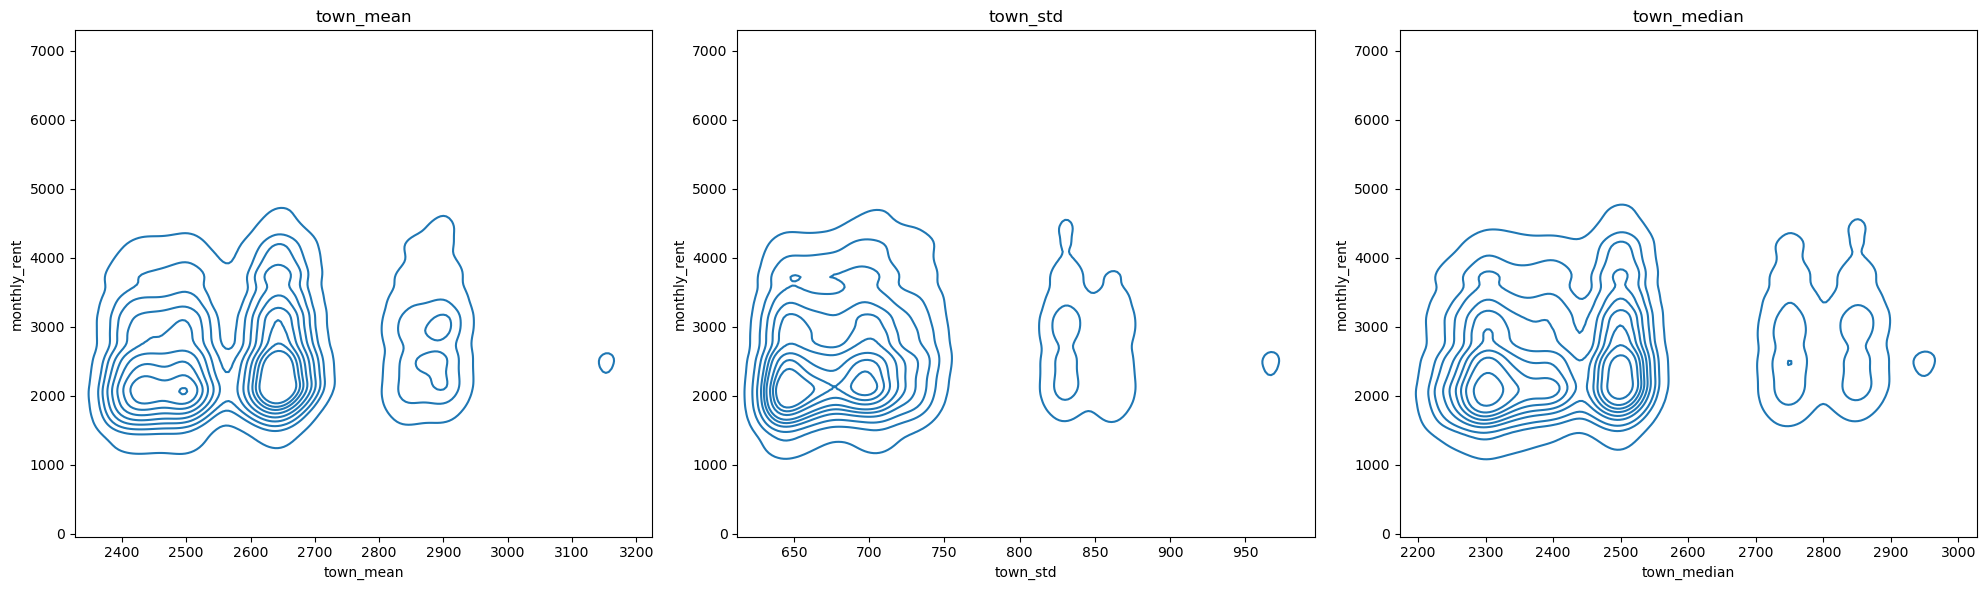

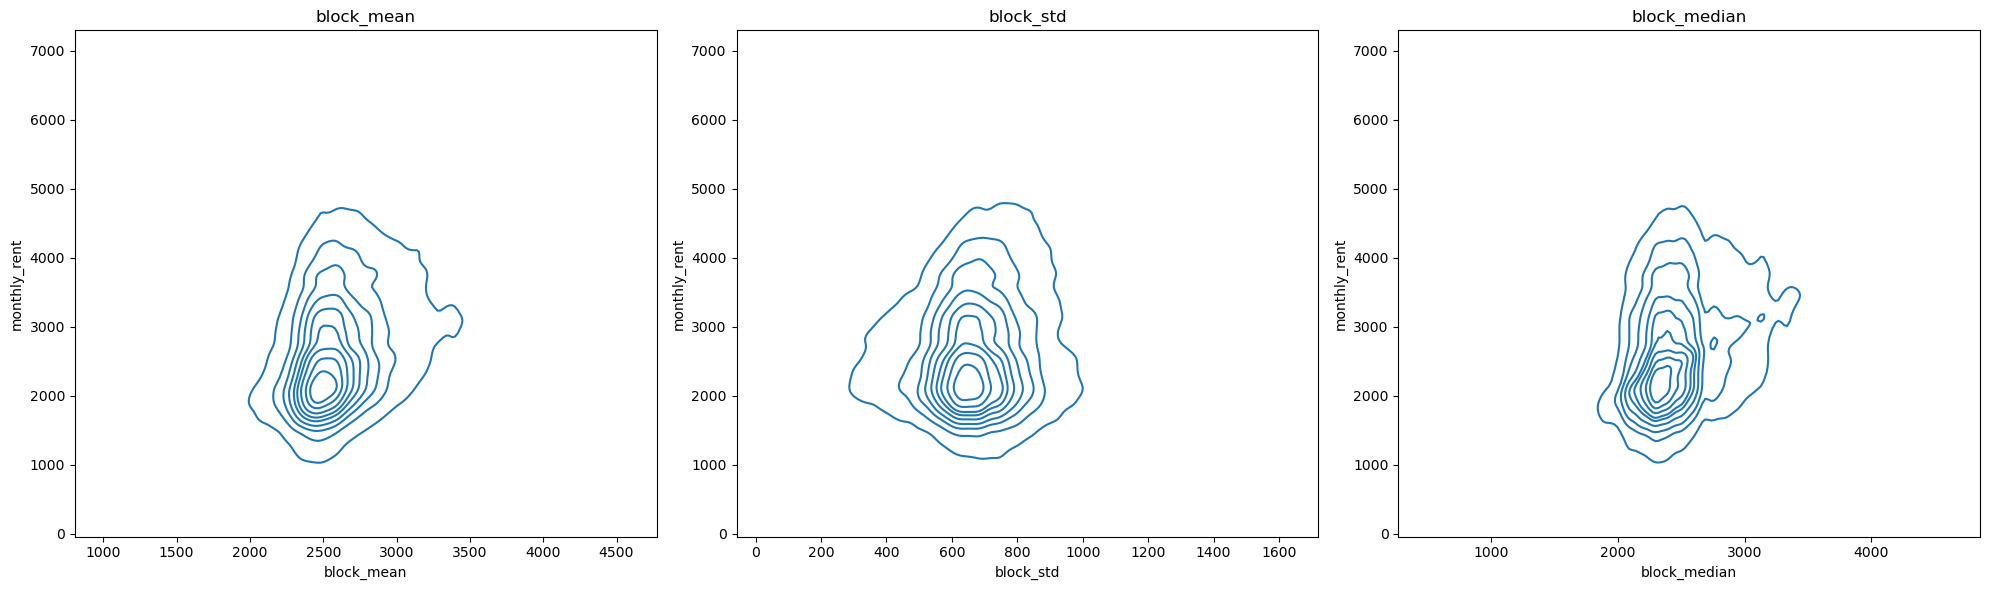

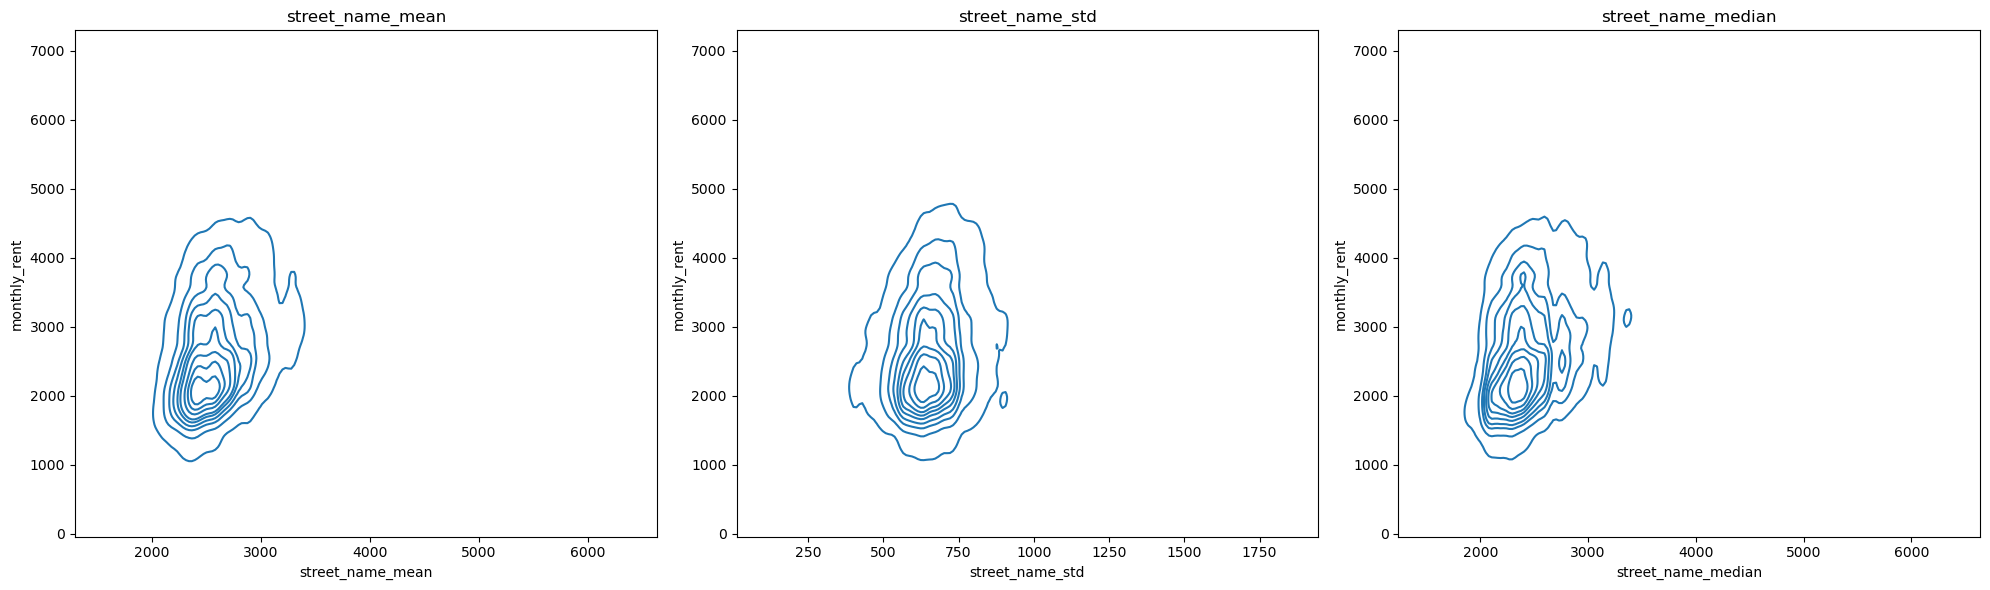

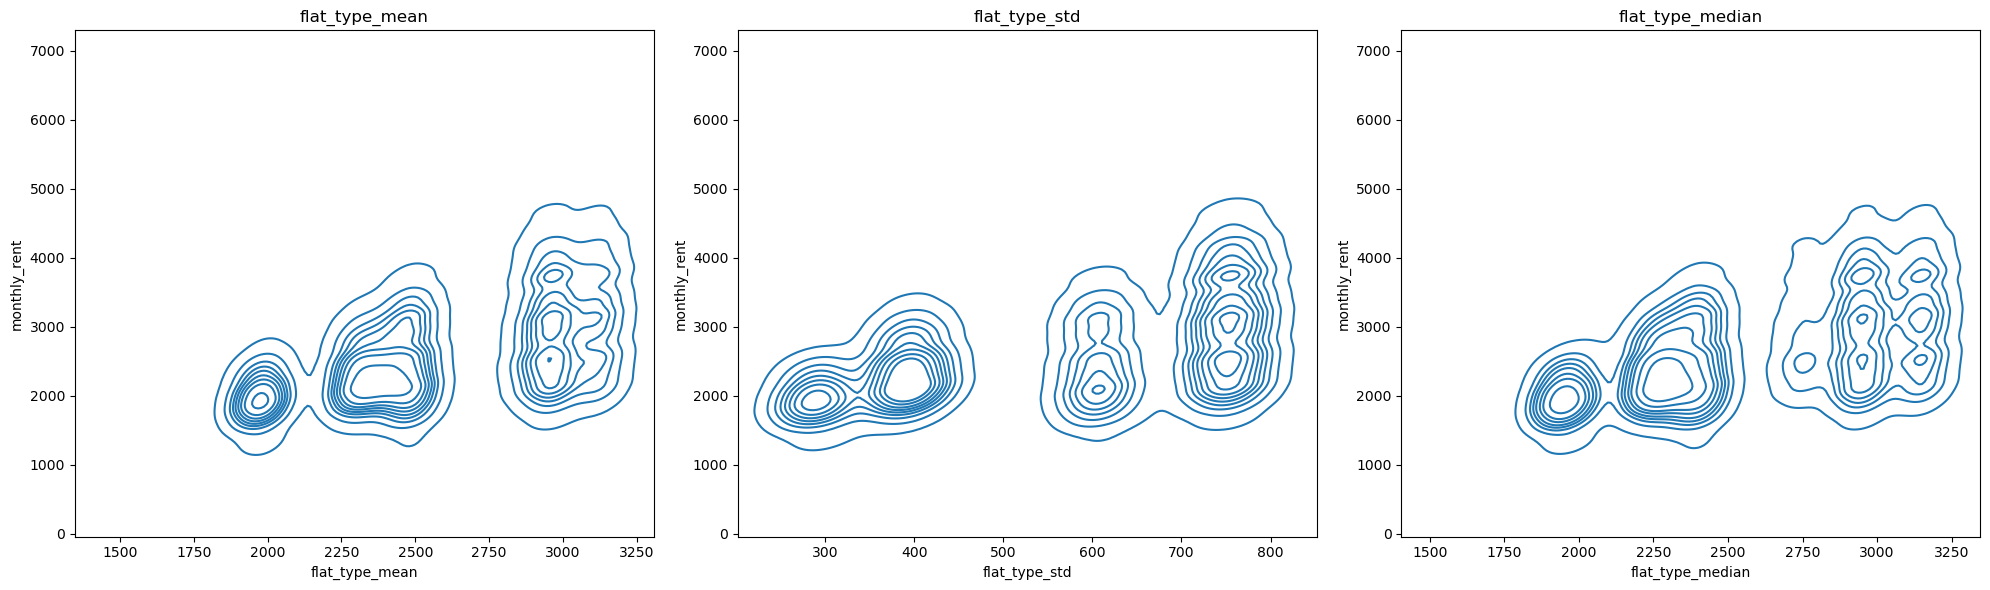

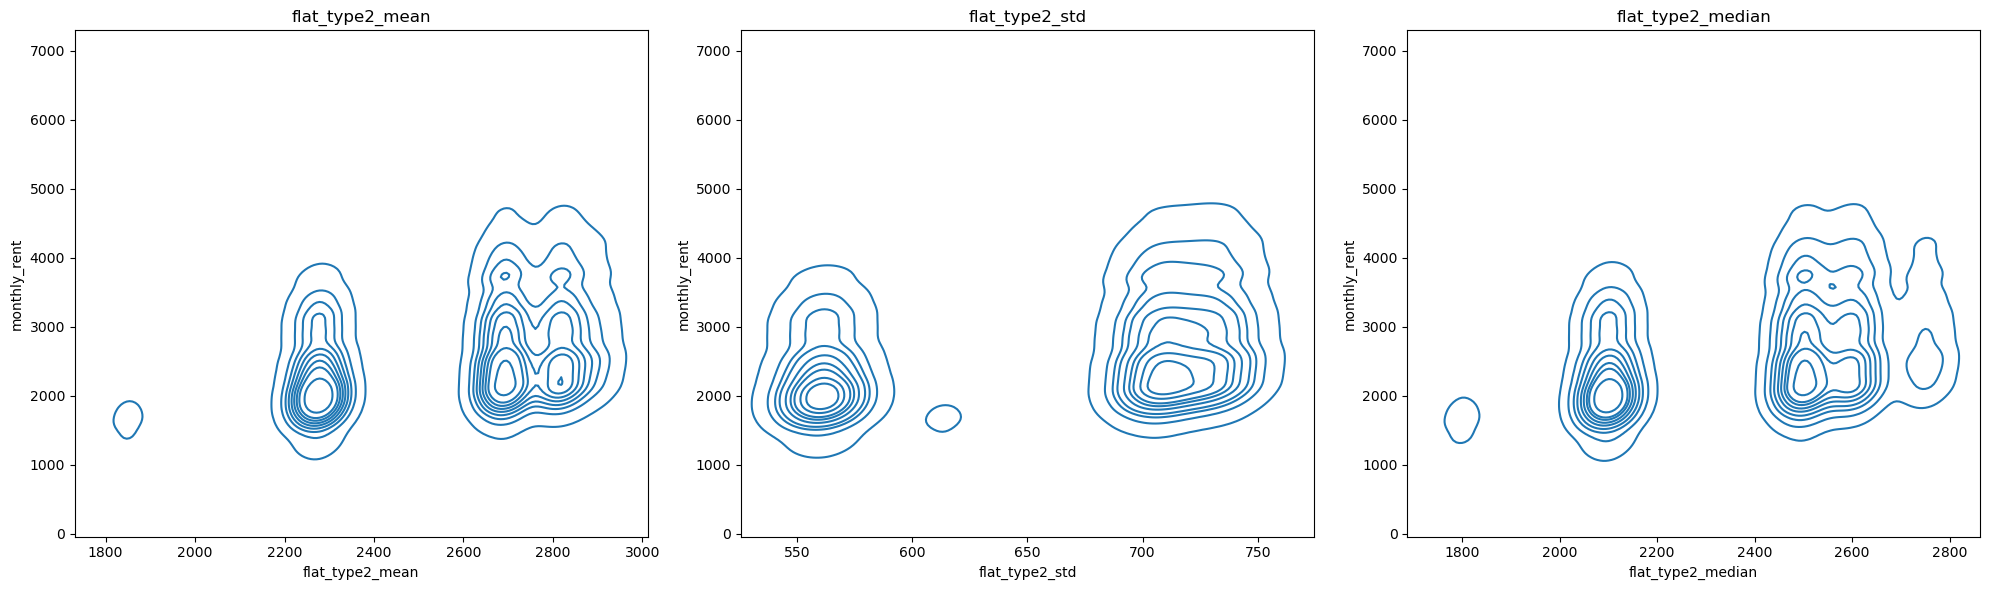

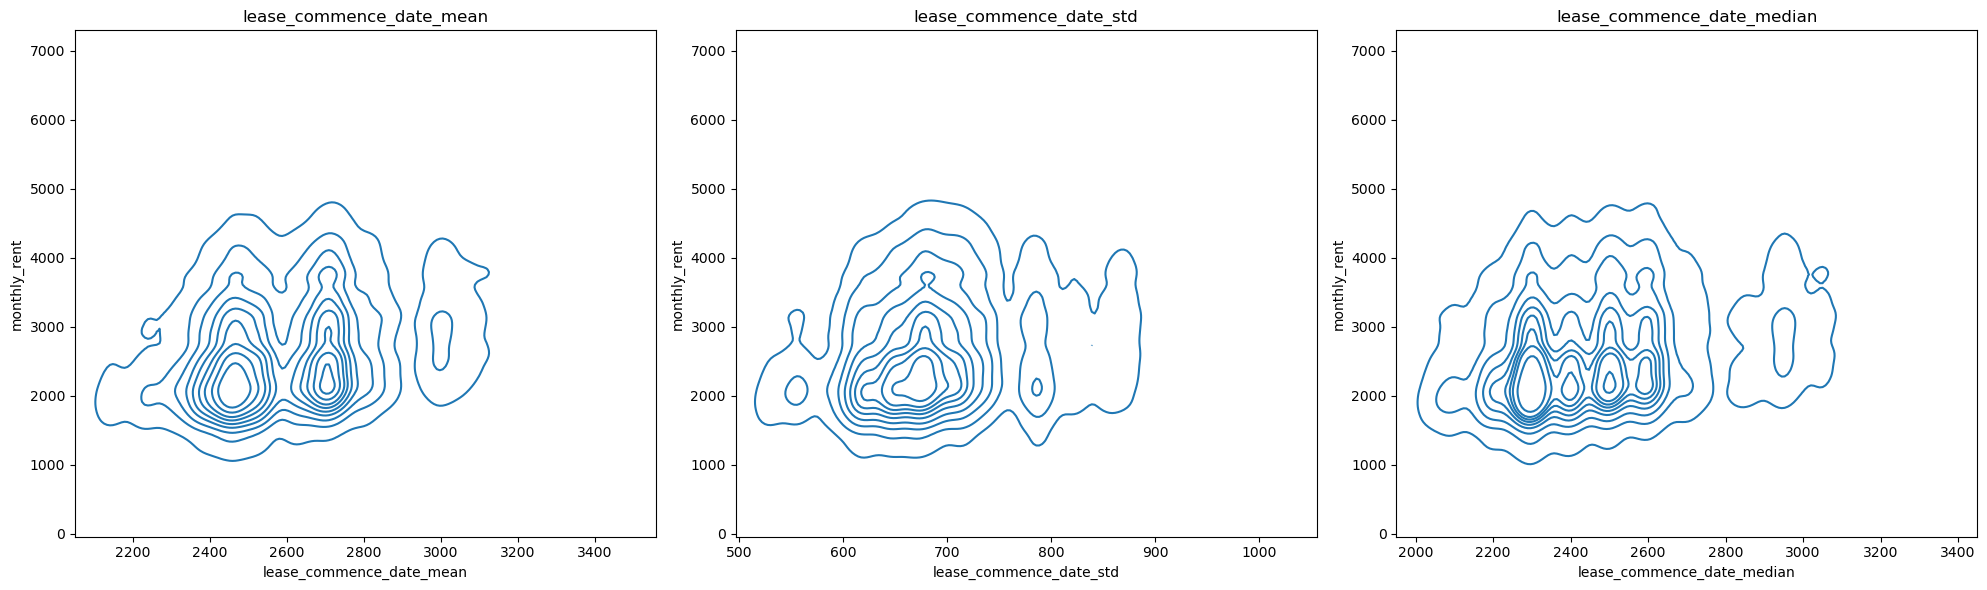

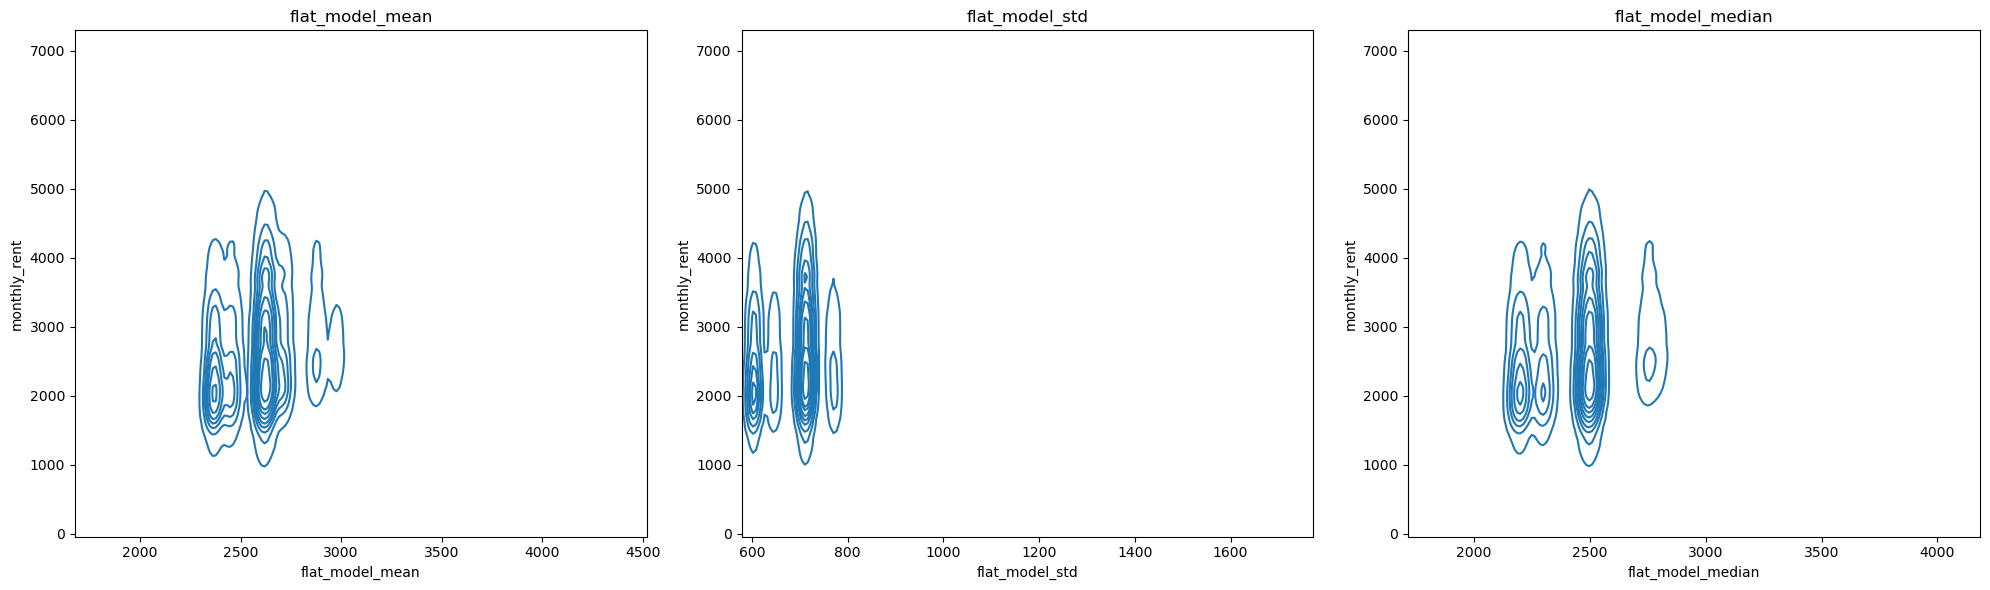

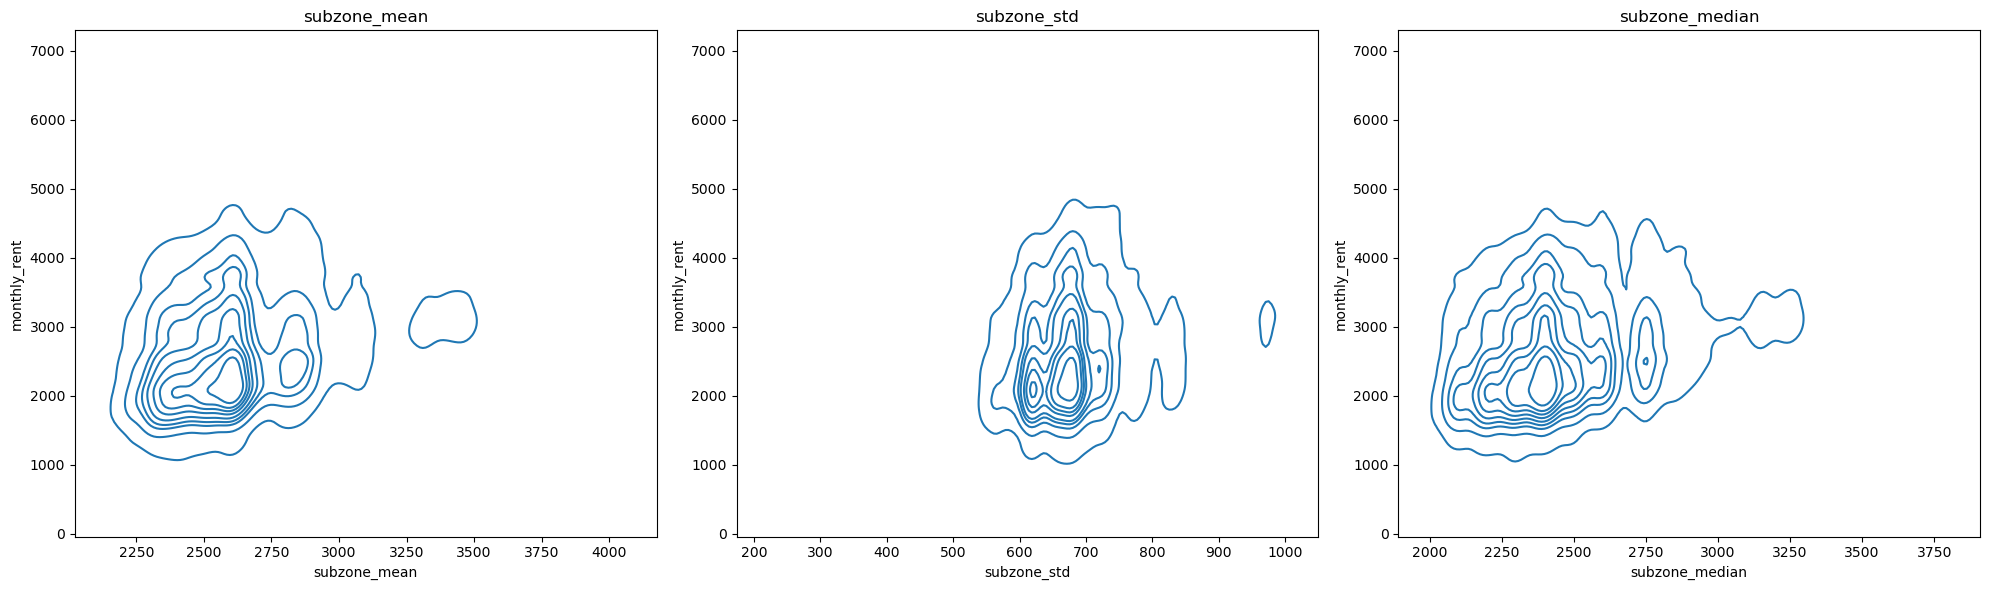

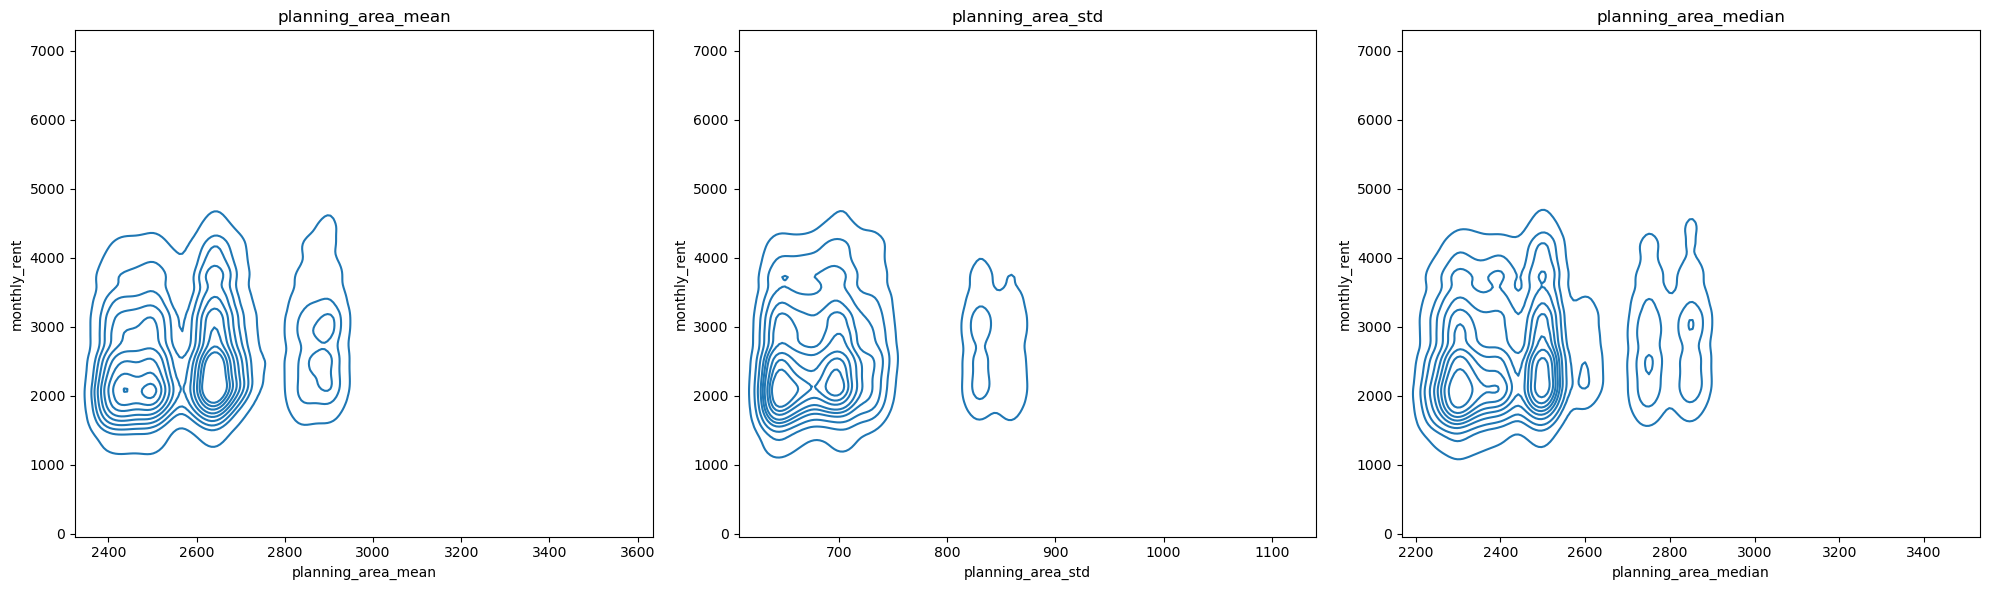

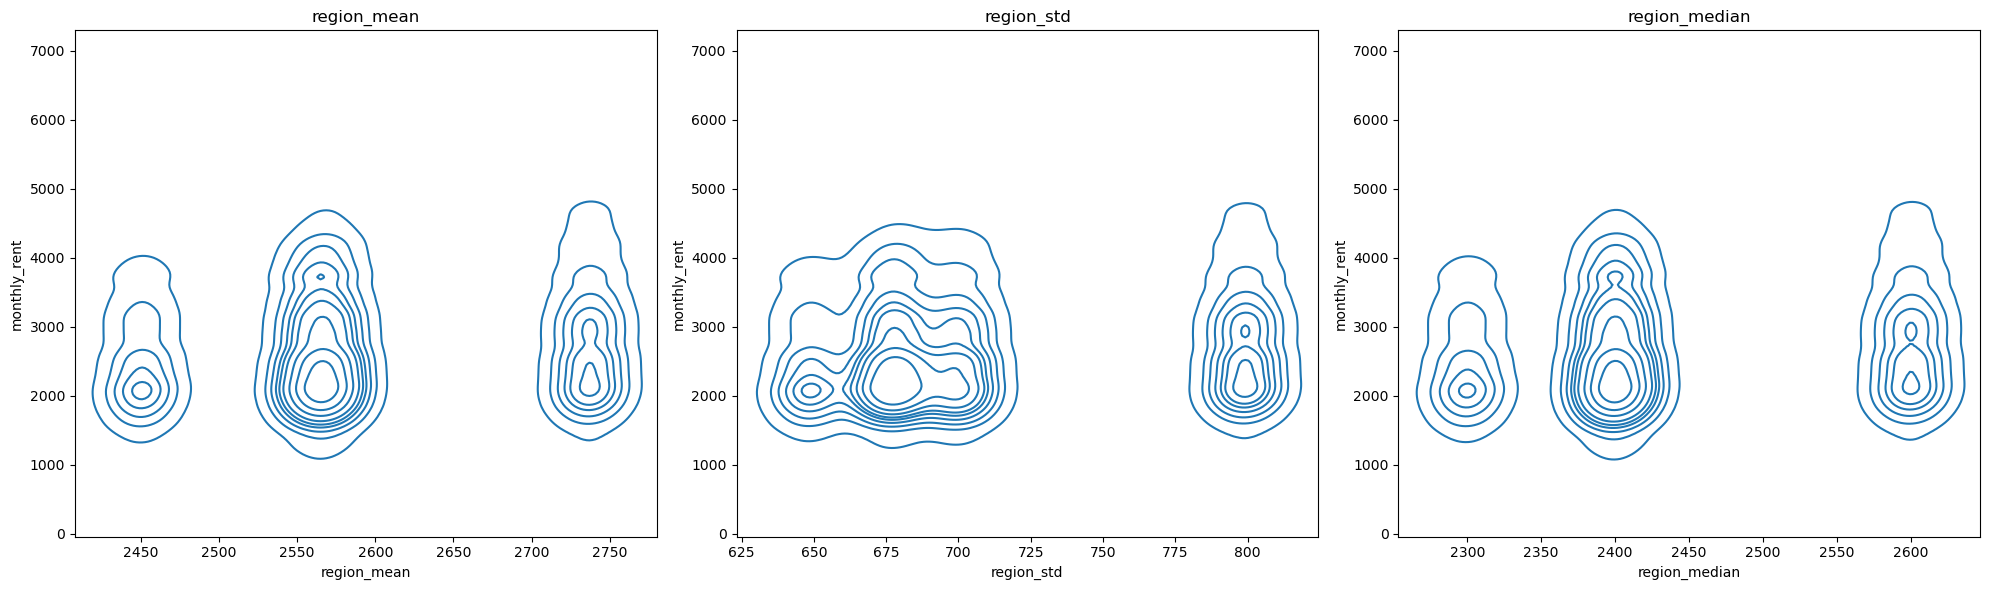

In [18]:
#drop kde columns with monthly_rent
agg = ['mean', 'std', 'median']
for feature in ['town', 'block', 'street_name', 'flat_type', 'flat_type2', 'lease_commence_date', 'flat_model', 'subzone', 'planning_area','region']:
    plt.figure(figsize=(20, 6))
    for a in agg:
        plt.subplot(1, 3, agg.index(a)+1)
        sns.kdeplot(x = feature+'_'+a, y = 'monthly_rent', data=df_train_num)
        plt.title(feature+'_'+a)
    plt.tight_layout()
    plt.savefig('kde_category_'+feature+'.png')

In [5]:
#data clean
df_train.isnull().sum()

rent_approval_date     0
town                   0
block                  0
street_name            0
flat_type              0
flat_model             0
floor_area_sqm         0
furnished              0
lease_commence_date    0
latitude               0
longitude              0
elevation              0
subzone                0
planning_area          0
region                 0
monthly_rent           0
dtype: int64

In [6]:
df_train.dtypes

rent_approval_date      object
town                    object
block                   object
street_name             object
flat_type               object
flat_model              object
floor_area_sqm         float64
furnished               object
lease_commence_date      int64
latitude               float64
longitude              float64
elevation              float64
subzone                 object
planning_area           object
region                  object
monthly_rent             int64
dtype: object

<Axes: xlabel='rent_approval_date', ylabel='monthly_rent'>

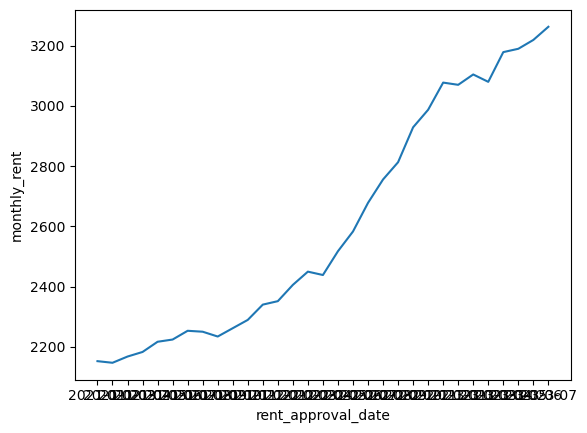

In [7]:
#price by date
#get mean price by date
ds = df_train.groupby('rent_approval_date')['monthly_rent'].mean().reset_index()
sns.lineplot(x='rent_approval_date', y='monthly_rent', data=ds)

In [8]:
df_train.describe()
df_train['rent_approval_date'] = pd.to_datetime(df_train['rent_approval_date'])
df_train['rent_approval_year'] = df_train['rent_approval_date'].dt.year
df_train['rent_approval_month'] = df_train['rent_approval_date'].dt.month/12 + df_train['rent_approval_date'].dt.year

In [9]:
#plot test distribution
fig = px.histogram(df_test, x="rent_approval_date", nbins=100)
fig.show()

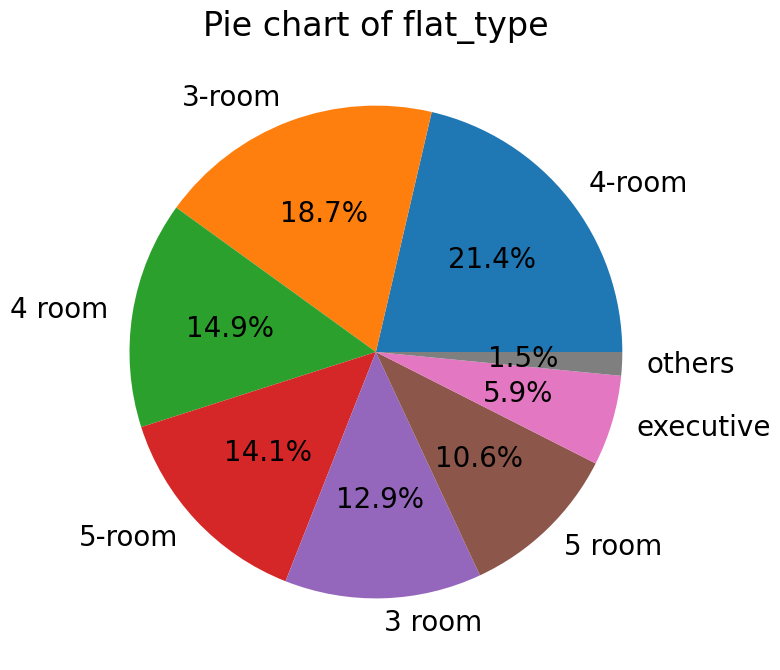

In [10]:
#pie chart for categorical data
plt.rcParams['font.size'] = 20
lab = 'flat_type'
plt.figure(figsize=(8, 8))
counts = df_test[lab].value_counts()
labels = df_test[lab].value_counts().index
#set others with < 5% to 'others'
the = 0.02
others = counts[counts/counts.sum() <= the].sum()
counts = counts[counts/counts.sum() > the]
if others > 0:
    counts['others'] = others
labels = counts.index

plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Pie chart of ' + lab)
plt.show()


In [11]:
df_train

rent_approval_date             town block            street_name  \
0             2021-09-01      jurong east   257  Jurong East Street 24   
1             2022-05-01            bedok   119       bedok north road   
2             2022-10-01        toa payoh   157     lorong 1 toa payoh   
3             2021-08-01        pasir ris   250    Pasir Ris Street 21   
4             2022-11-01  kallang/whampoa    34           Whampoa West   
...                  ...              ...   ...                    ...   
59995         2021-09-01       ang mo kio   441   Ang Mo Kio Avenue 10   
59996         2023-04-01      bukit merah   95a         henderson road   
59997         2022-06-01         tampines  862a     tampines street 83   
59998         2023-01-01            bedok    67     Bedok Sth Avenue 3   
59999         2023-02-01       ang mo kio   445   Ang Mo Kio Avenue 10   

       flat_type      flat_model  floor_area_sqm furnished  \
0         3 room  new generation            67.0       yes   
1         4-room  new generation            92.0       yes   
2         3-room        improved            67.0       yes   
3      executive       apartment           149.0       yes   
4         3-room        improved            68.0       yes   
...          ...             ...             ...       ...   
59995     3 room  new generation            67.0       yes   
59996     4-room         model a            83.0       yes   
59997     5-room        improved           122.0       yes   
59998     5-room        standard           123.0       yes   
59999     3-room  new generation            67.0       yes   

       lease_commence_date  latitude   longitude  elevation  \
0                     1983  1.344518  103.738630        0.0   
1                     1978  1.330186  103.938717        0.0   
2                     1971  1.332242  103.845643        0.0   
3                     1993  1.370239  103.962894        0.0   
4                     1972  1.320502  103.863341        0.0   
...                    ...       ...         ...        ...   
59995                 1979  1.366050  103.854168        0.0   
59996                 2019  1.286493  103.821434        0.0   
59997                 1988  1.355064  103.936507        0.0   
59998                 1977  1.318974  103.944076        0.0   
59999                 1979  1.366980  103.855718        0.0   

                 subzone planning_area             region  monthly_rent  \
0             yuhua east   jurong east        west region          1600   
1            bedok north         bedok        east region          2250   
2      toa payoh central     toa payoh     central region          1900   
3        pasir ris drive     pasir ris        east region          2850   
4              bendemeer       kallang     central region          2100   
...                  ...           ...                ...           ...   
59995         chong boon    ang mo kio  north-east region          2200   
59996     henderson hill   bukit merah     central region          4100   
59997      tampines west      tampines        east region          2250   
59998        bedok south         bedok        east region          4700   
59999         chong boon    ang mo kio  north-east region          2850   

       rent_approval_year  rent_approval_month  
0                    2021          2021.750000  
1                    2022          2022.416667  
2                    2022          2022.833333  
3                    2021          2021.666667  
4                    2022          2022.916667  
...                   ...                  ...  
59995                2021          2021.750000  
59996                2023          2023.333333  
59997                2022          2022.500000  
59998                2023          2023.083333  
59999                2023          2023.166667  

[60000 rows x 18 columns]

In [12]:
df_train.describe()

rent_approval_date  floor_area_sqm  lease_commence_date  \
count                          60000    60000.000000         60000.000000   
mean   2022-03-20 00:57:57.599999744       94.480458          1990.876367   
min              2021-01-01 00:00:00       34.000000          1966.000000   
25%              2021-08-01 00:00:00       73.000000          1981.000000   
50%              2022-03-01 00:00:00       93.000000          1988.000000   
75%              2022-12-01 00:00:00      110.000000          2000.000000   
max              2023-07-01 00:00:00      215.000000          2019.000000   
std                              NaN       24.082642            12.141435   

           latitude     longitude  elevation  monthly_rent  \
count  60000.000000  60000.000000    60000.0  60000.000000   
mean       1.359443    103.840110        0.0   2590.328333   
min        1.270380    103.685228        0.0    300.000000   
25%        1.330939    103.778803        0.0   2100.000000   
50%        1.354024    103.845301        0.0   2400.000000   
75%        1.386968    103.897418        0.0   3000.000000   
max        1.457071    103.964915        0.0   6950.000000   
std        0.042505      0.071627        0.0    714.910468   

       rent_approval_year  rent_approval_month  
count        60000.000000         60000.000000  
mean          2021.813050          2022.299508  
min           2021.000000          2021.083333  
25%           2021.000000          2021.666667  
50%           2022.000000          2022.250000  
75%           2022.000000          2023.000000  
max           2023.000000          2023.583333  
std              0.780006             0.758707

KeyboardInterrupt: 

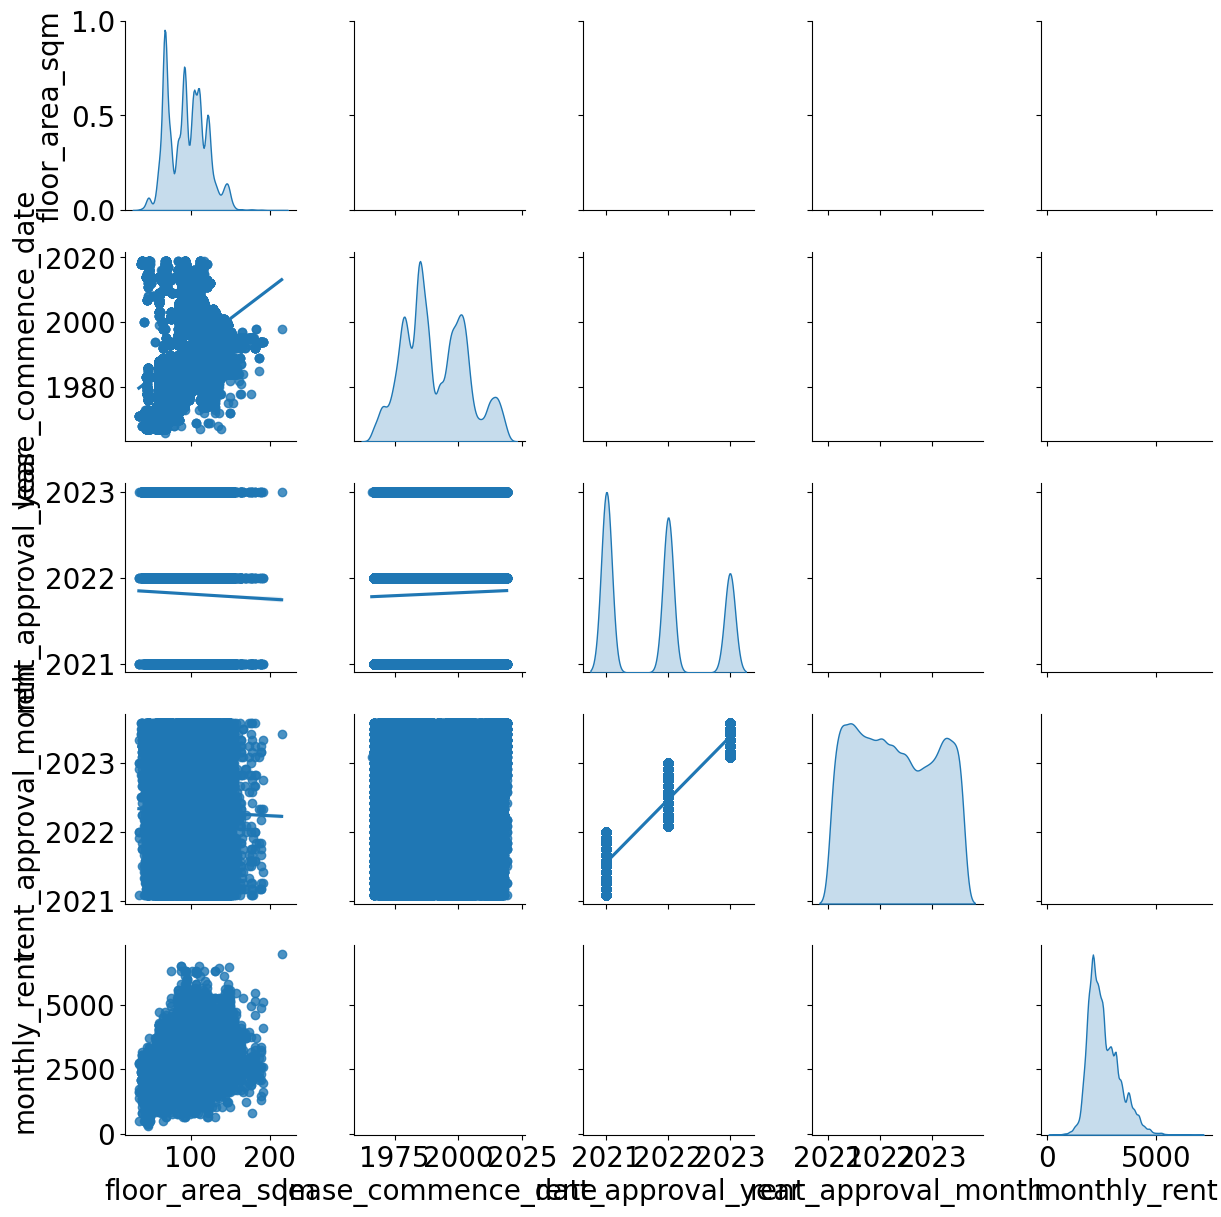

In [13]:
#draw corr distribution plot
sns.pairplot(df_train[['floor_area_sqm', 'lease_commence_date', 'rent_approval_year', 'rent_approval_month', 'monthly_rent']], diag_kind='kde', kind='reg')


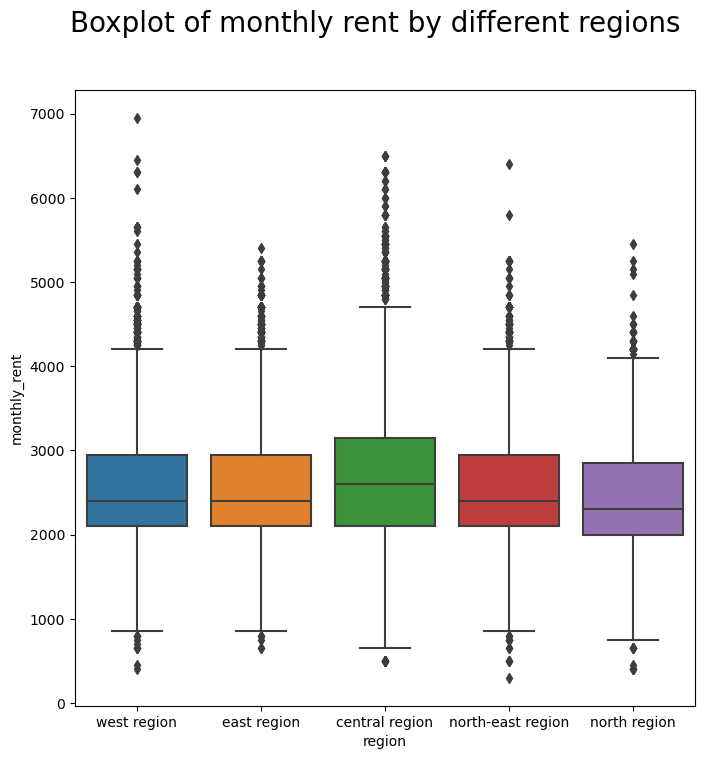

In [ ]:
fig = plt.figure(figsize=(8, 8))
#sns.boxplot(x='town', y='monthly_rent', data=df_train)
#sns.boxplot(x='flat_type', y='monthly_rent', data=df_train)
#sns.boxplot(x='flat_model', y='monthly_rent', data=df_train)
#sns.boxplot(x='planning_area', y='monthly_rent', data=df_train, ax=ax[1, 0])
sns.boxplot(x='region', y='monthly_rent', data=df_train)
#sns.boxplot(x='furnished', y='monthly_rent', data=df_train, ax=ax[1, 2])
#set title
fig.suptitle('Boxplot of monthly rent by different regions', fontsize=20)
fig.savefig('boxplot_regions.png')

In [ ]:
labels = df_train.columns
labels

Index(['rent_approval_date', 'town', 'block', 'street_name', 'flat_type',
       'flat_model', 'floor_area_sqm', 'furnished', 'lease_commence_date',
       'latitude', 'longitude', 'elevation', 'subzone', 'planning_area',
       'region', 'monthly_rent', 'rent_approval_year', 'rent_approval_month'],
      dtype='object')

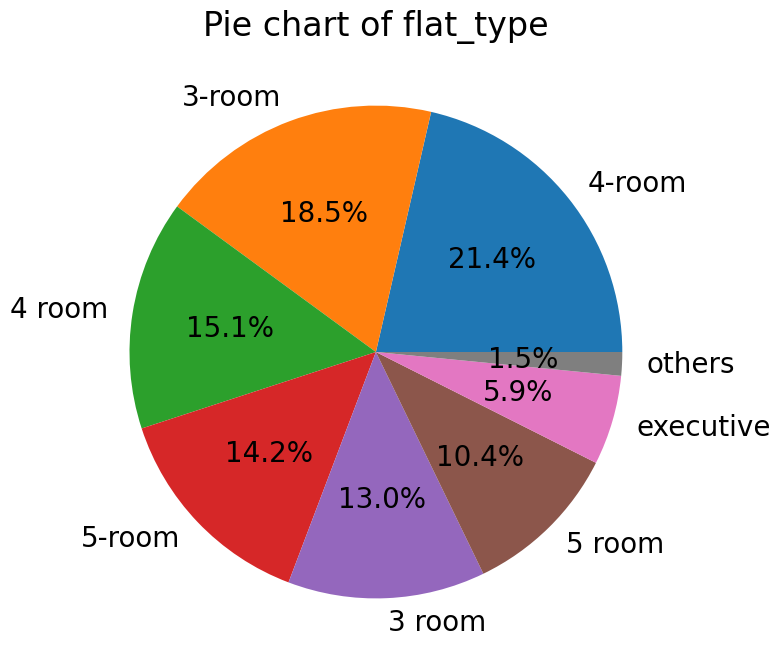

In [ ]:
#pie chart for categorical data
plt.rcParams['font.size'] = 20
lab = 'flat_type'
plt.figure(figsize=(8, 8))
counts = df_train[lab].value_counts()
labels = df_train[lab].value_counts().index
#set others with < 5% to 'others'
the = 0.02
others = counts[counts/counts.sum() <= the].sum()
counts = counts[counts/counts.sum() > the]
if others > 0:
    counts['others'] = others
labels = counts.index

plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Pie chart of ' + lab)
plt.savefig('pie_' + lab + '.png')



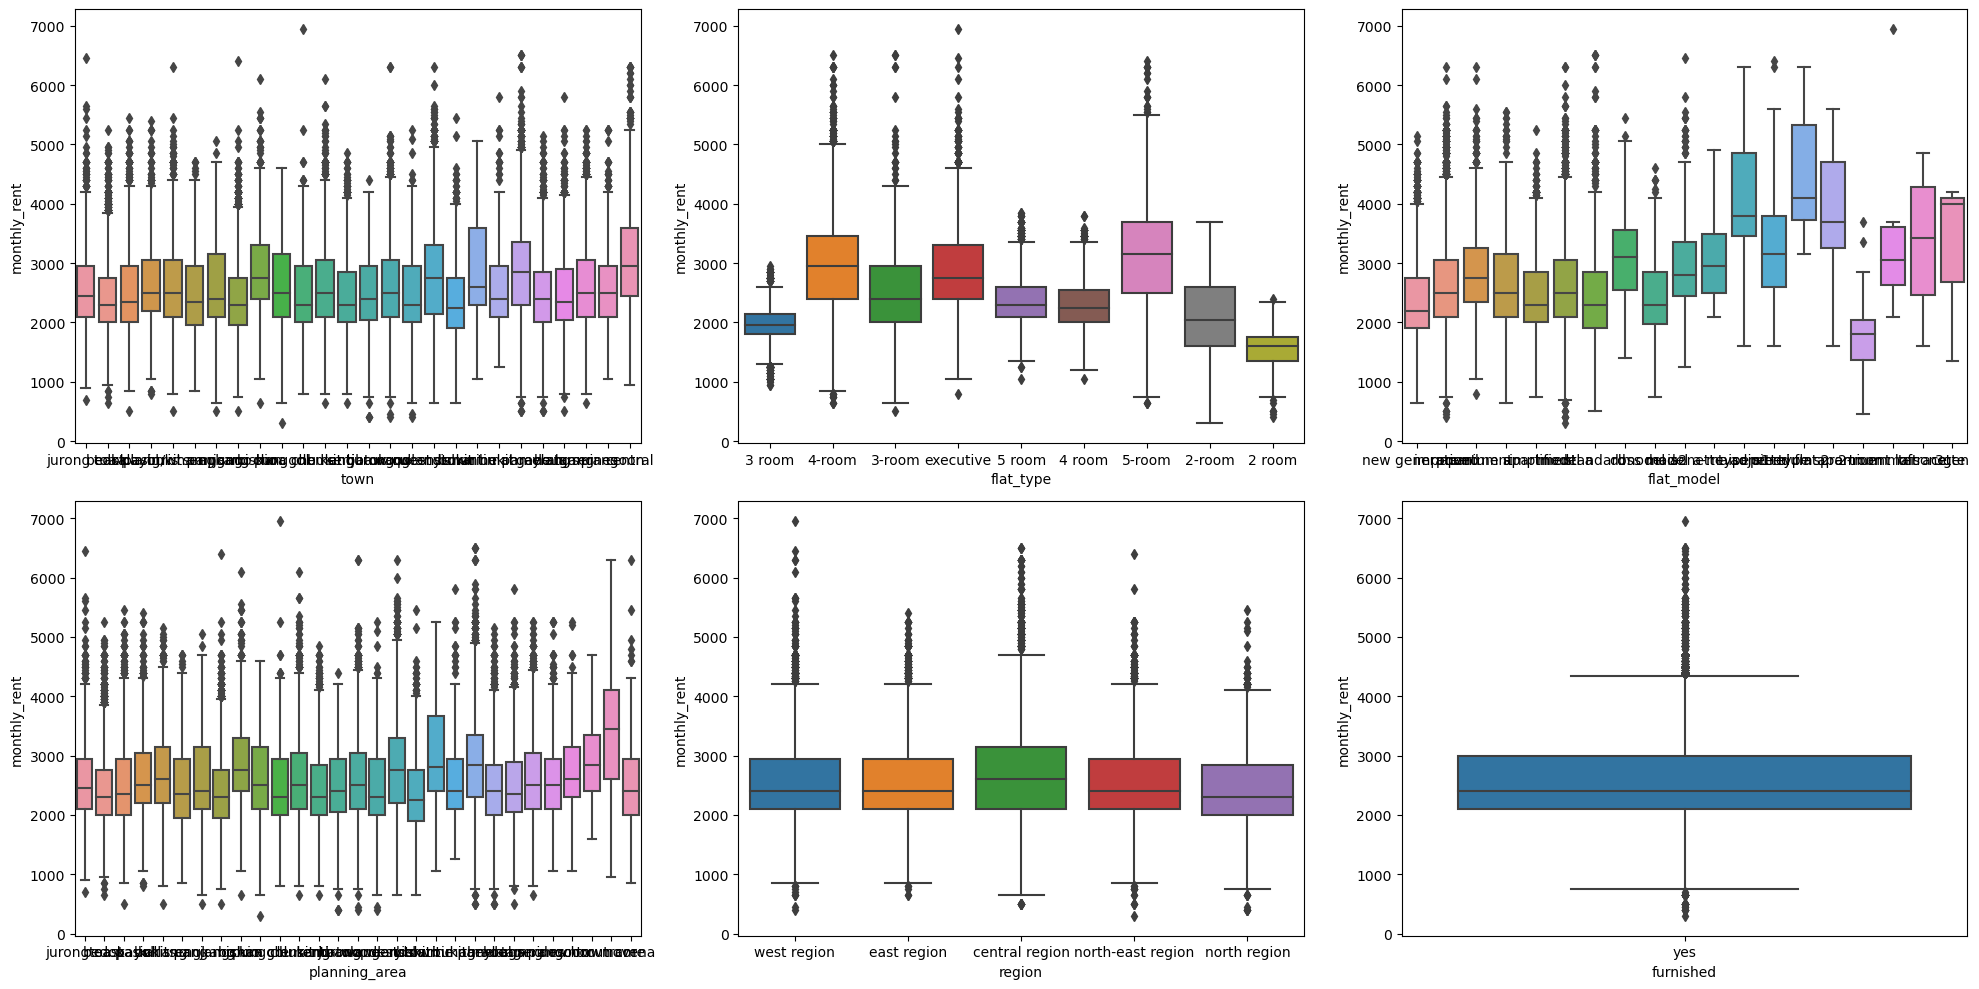

In [ ]:
#draw distribution for categorical variables and monthly rent
#town	street_name	flat_type	flat_model	subzone	planning_area	region
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
sns.boxplot(x='town', y='monthly_rent', data=df_train, ax=ax[0, 0])
sns.boxplot(x='flat_type', y='monthly_rent', data=df_train, ax=ax[0, 1])
sns.boxplot(x='flat_model', y='monthly_rent', data=df_train, ax=ax[0, 2])
sns.boxplot(x='planning_area', y='monthly_rent', data=df_train, ax=ax[1, 0])
sns.boxplot(x='region', y='monthly_rent', data=df_train, ax=ax[1, 1])
sns.boxplot(x='furnished', y='monthly_rent', data=df_train, ax=ax[1, 2])
plt.tight_layout()



In [ ]:
print(df_train['town'].unique())
print(df_train['flat_type'].unique())
print(df_train['flat_model'].unique())

['jurong east' 'bedok' 'toa payoh' 'pasir ris' 'kallang/whampoa'
 'bukit panjang' 'sengkang' 'ang mo kio' 'bishan' 'punggol'
 'choa chu kang' 'clementi' 'bukit batok' 'sembawang' 'jurong west'
 'woodlands' 'queenstown' 'yishun' 'bukit timah' 'marine parade'
 'bukit merah' 'geylang' 'hougang' 'tampines' 'serangoon' 'central']
['3 room' '4-room' '3-room' 'executive' '5 room' '4 room' '5-room'
 '2-room' '2 room']
['new generation' 'improved' 'apartment' 'premium apartment' 'simplified'
 'model a' 'standard' 'dbss' 'model a2' 'maisonette' 'model a-maisonette'
 'type s1' 'adjoined flat' 'type s2' 'premium apartment loft' '2-room'
 'premium maisonette' 'terrace' '3gen']


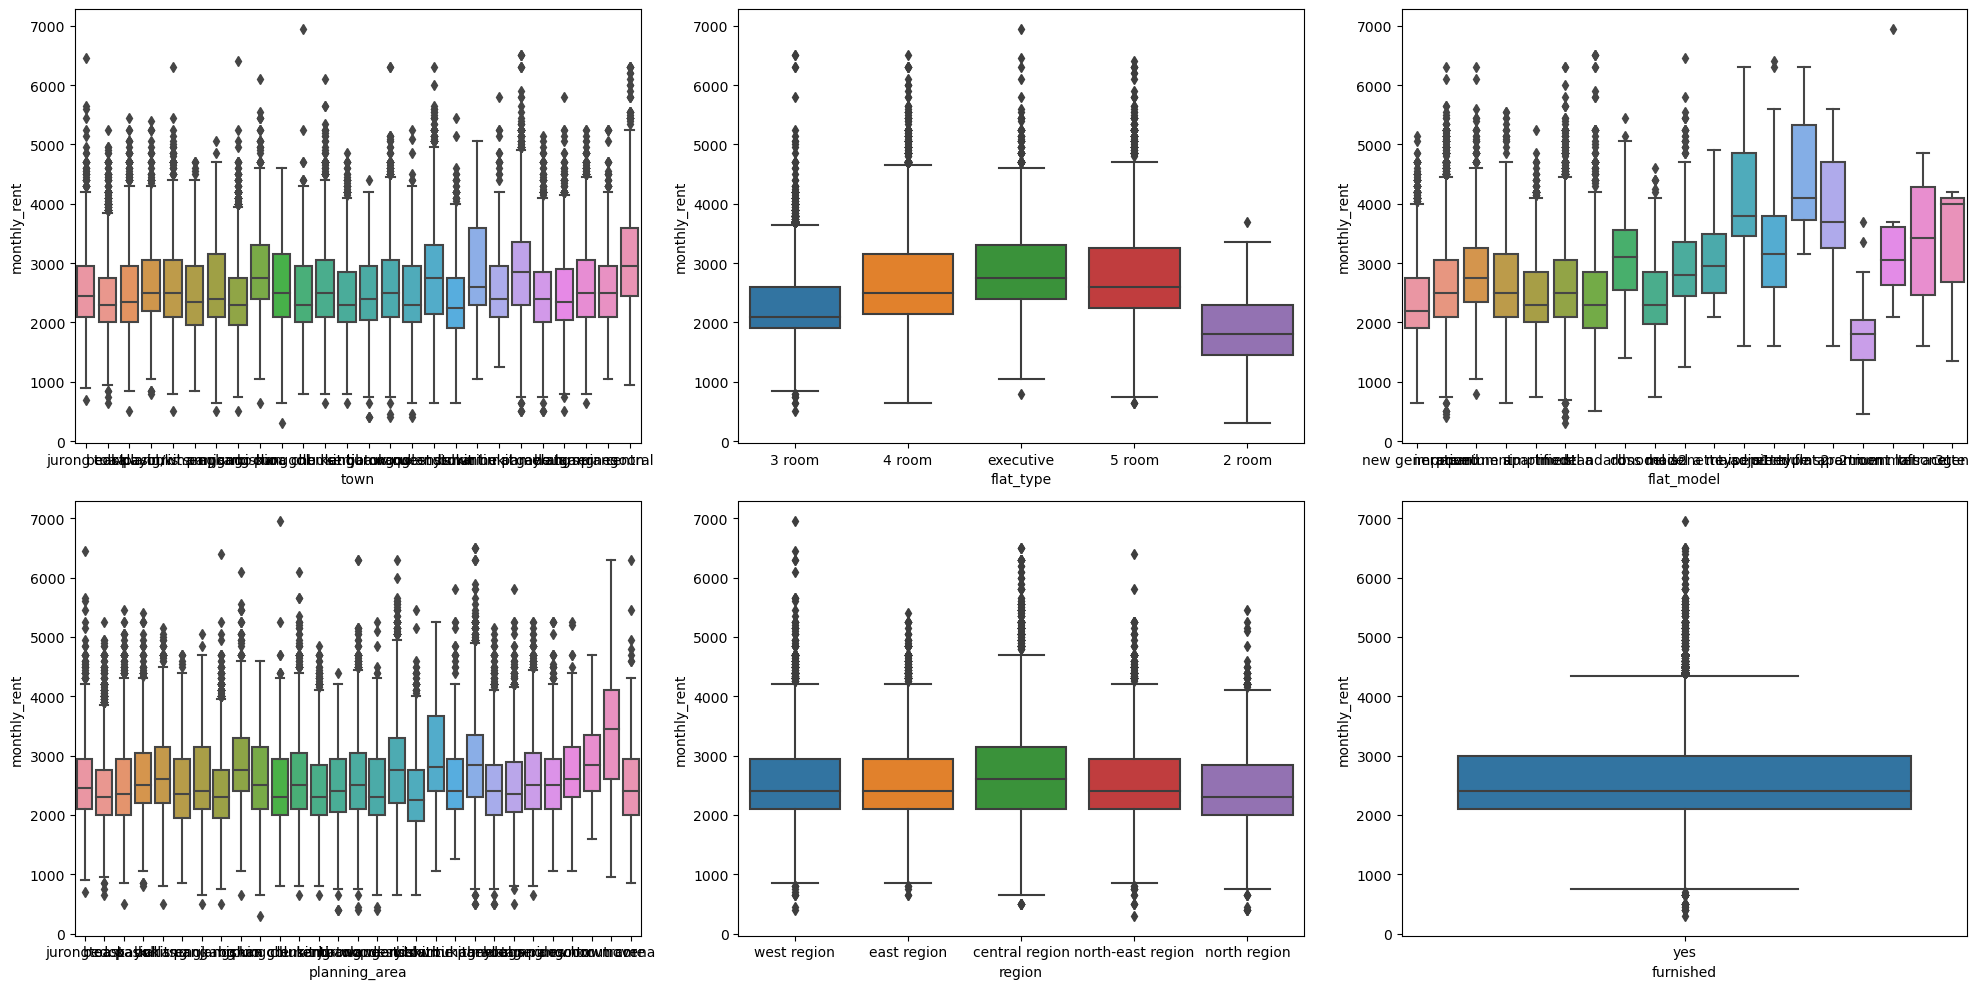

In [ ]:
#remove '-'
df_train['flat_type'] = df_train['flat_type'].str.replace('-', ' ')
df_train['flat_model'] = df_train['flat_model'].str.replace('-', ' ')

#draw distribution for categorical variables and monthly rent
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
sns.boxplot(x='town', y='monthly_rent', data=df_train, ax=ax[0, 0])
sns.boxplot(x='flat_type', y='monthly_rent', data=df_train, ax=ax[0, 1])
sns.boxplot(x='flat_model', y='monthly_rent', data=df_train, ax=ax[0, 2])
sns.boxplot(x='planning_area', y='monthly_rent', data=df_train, ax=ax[1, 0])
sns.boxplot(x='region', y='monthly_rent', data=df_train, ax=ax[1, 1])
sns.boxplot(x='furnished', y='monthly_rent', data=df_train, ax=ax[1, 2])
plt.tight_layout()


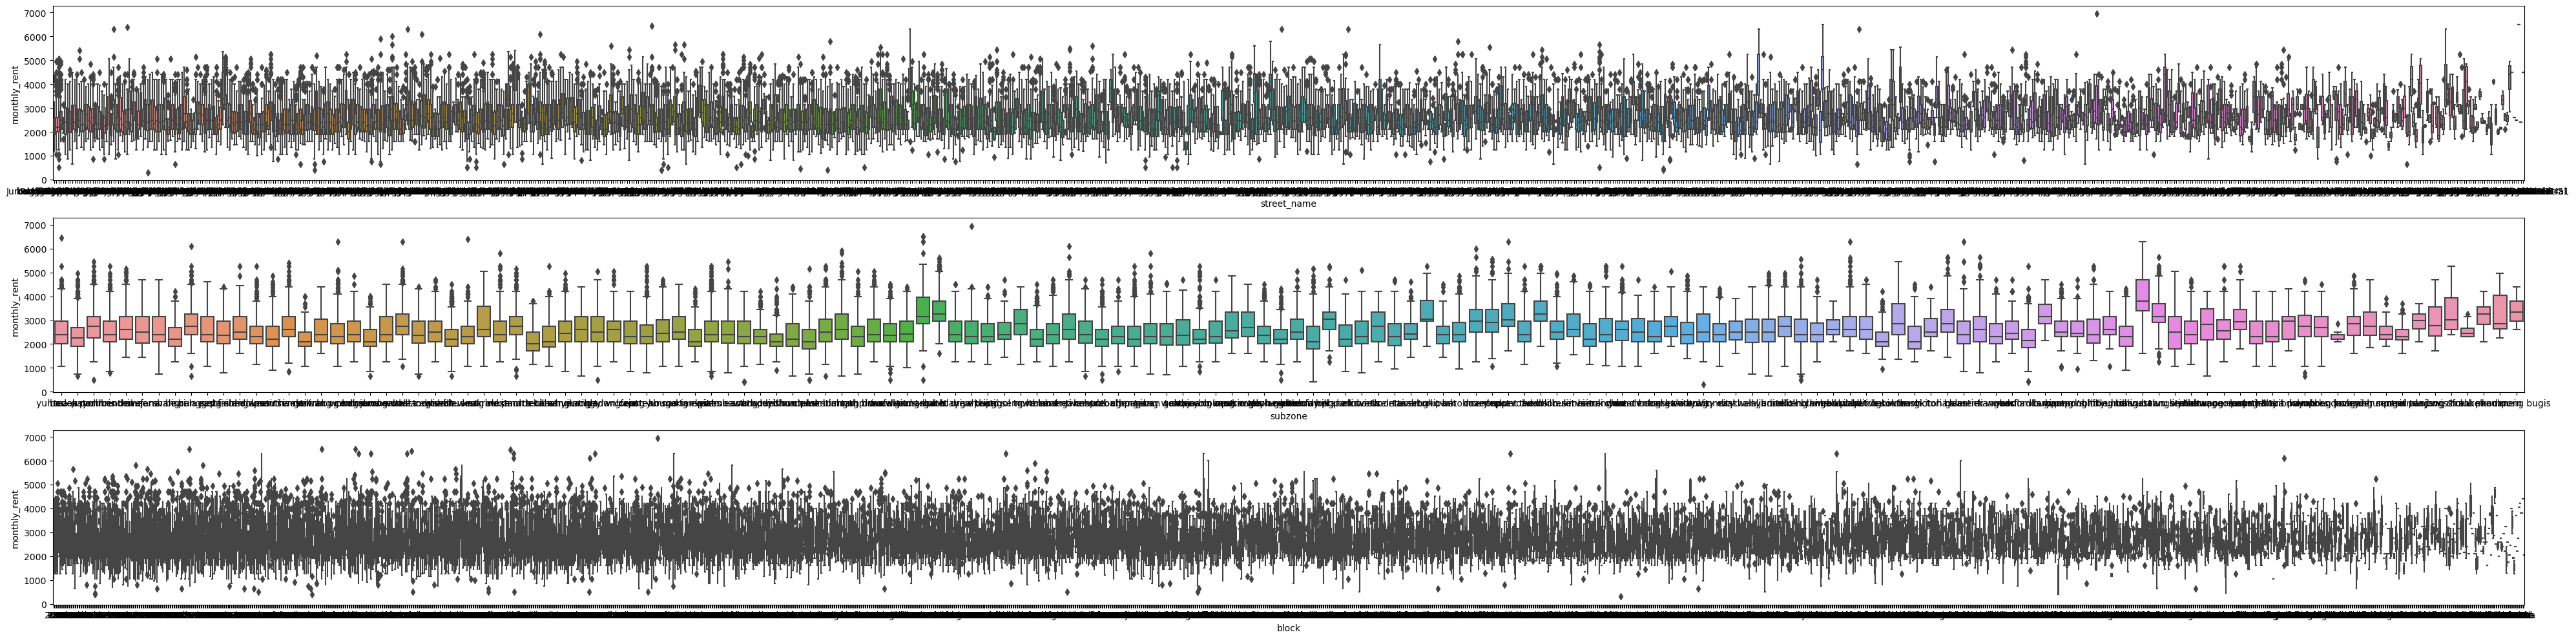

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(40, 10))
sns.boxplot(x='street_name', y='monthly_rent', data=df_train, ax=ax[0,])
sns.boxplot(x='subzone', y='monthly_rent', data=df_train, ax=ax[1,])
sns.boxplot(x='block', y='monthly_rent', data=df_train, ax=ax[2,])
plt.tight_layout()

c:\ProgramData\anaconda3\envs\CS5228\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



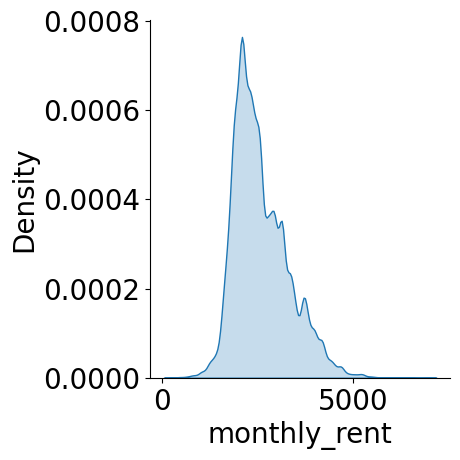

In [14]:
price = df_train['monthly_rent']
#price = np.log(price)
sns.displot(price, kind='kde', fill=True)

C:\Users\Concyclics\AppData\Local\Temp\ipykernel_9968\851240217.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(x='monthly_rent', data=df_train, kind='kde', fill=True, palette='crest', height=10, aspect=2)
c:\ProgramData\anaconda3\envs\CS5228\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


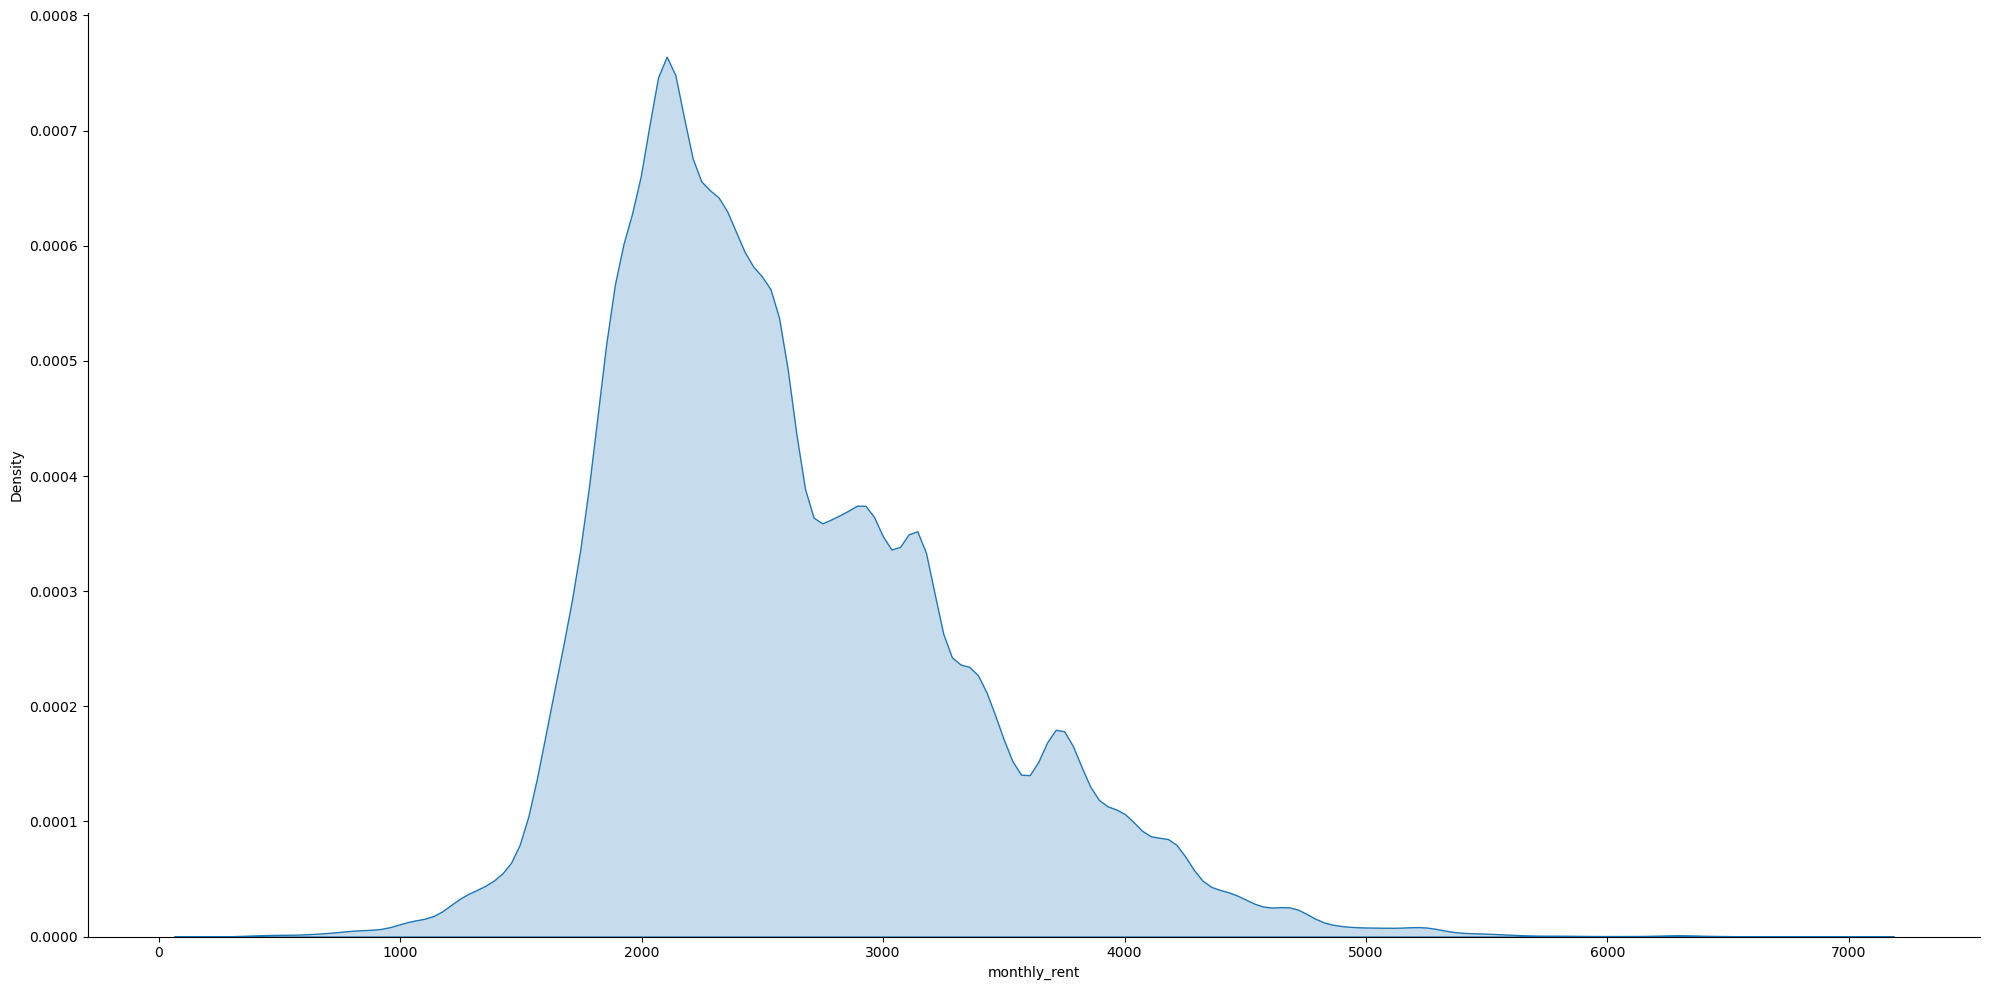

In [ ]:
#distribution of monthly rent via year
sns.displot(x='monthly_rent', data=df_train, hue='rent_approval_date', kind='kde', fill=True, palette='crest', height=10, aspect=2)


c:\ProgramData\anaconda3\envs\CS5228\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



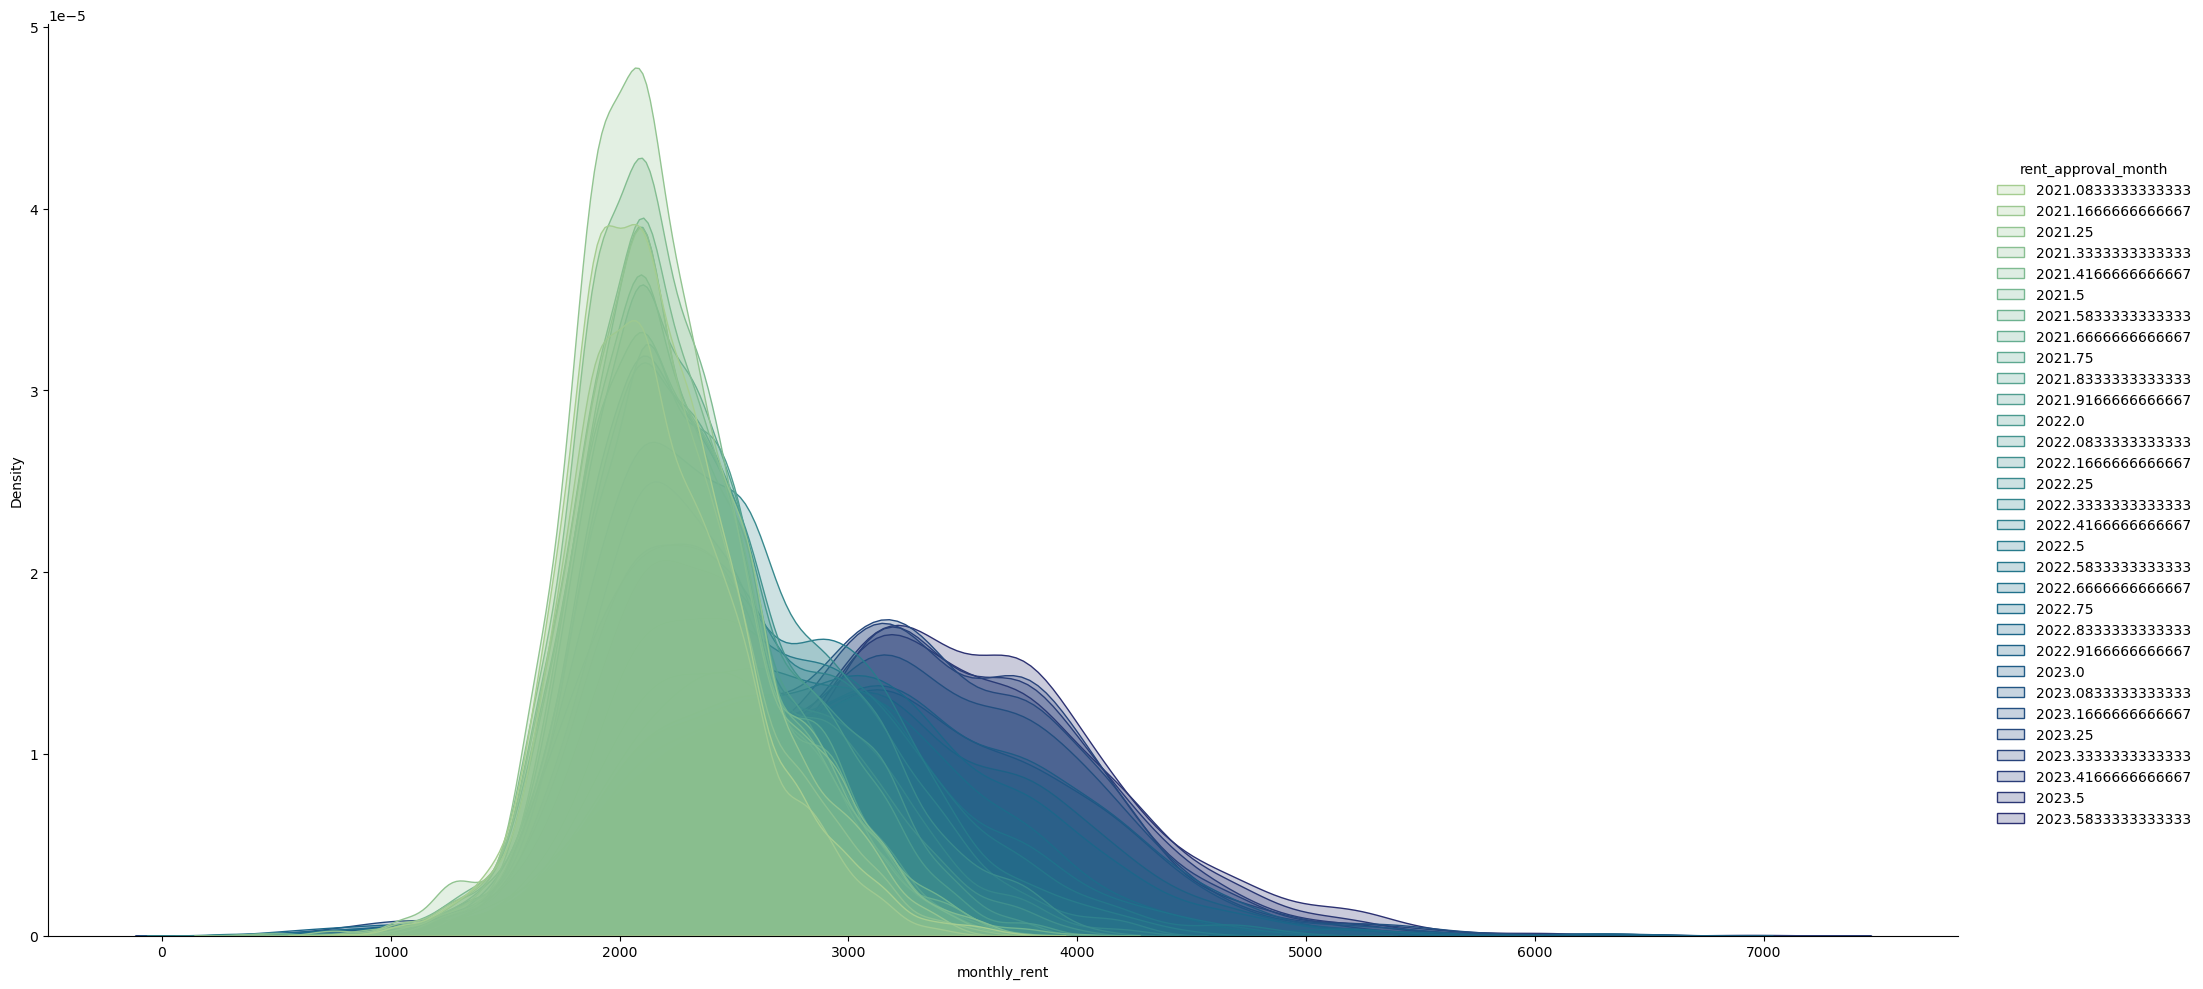

In [ ]:
#distribution of monthly rent via month
sns.displot(x='monthly_rent', data=df_train, hue='rent_approval_month', kind='kde', fill=True, palette='crest', height=10, aspect=2)


c:\ProgramData\anaconda3\envs\CS5228\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



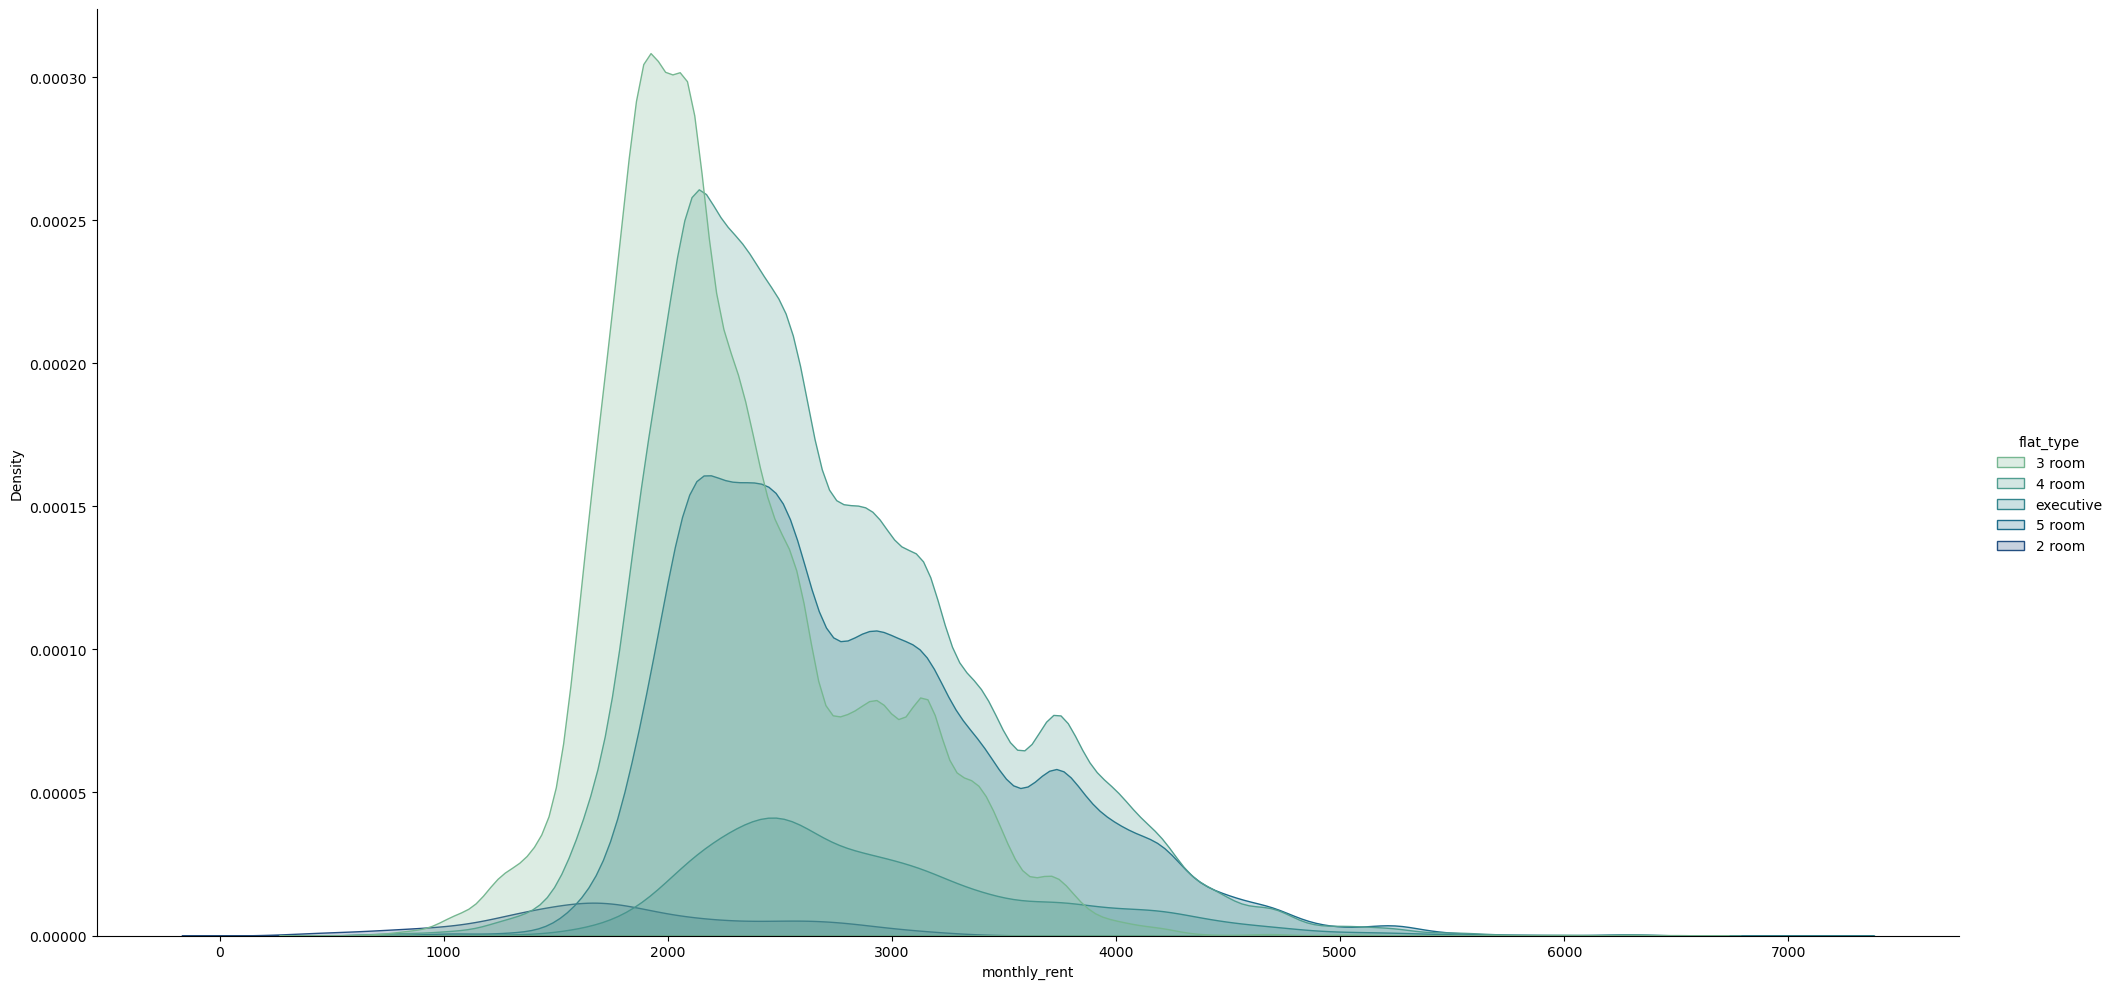

In [ ]:
#distribution of monthly rent via flat type
sns.displot(x='monthly_rent', data=df_train, hue='flat_type', kind='kde', fill=True, palette='crest', height=10, aspect=2)

c:\ProgramData\anaconda3\envs\CS5228\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



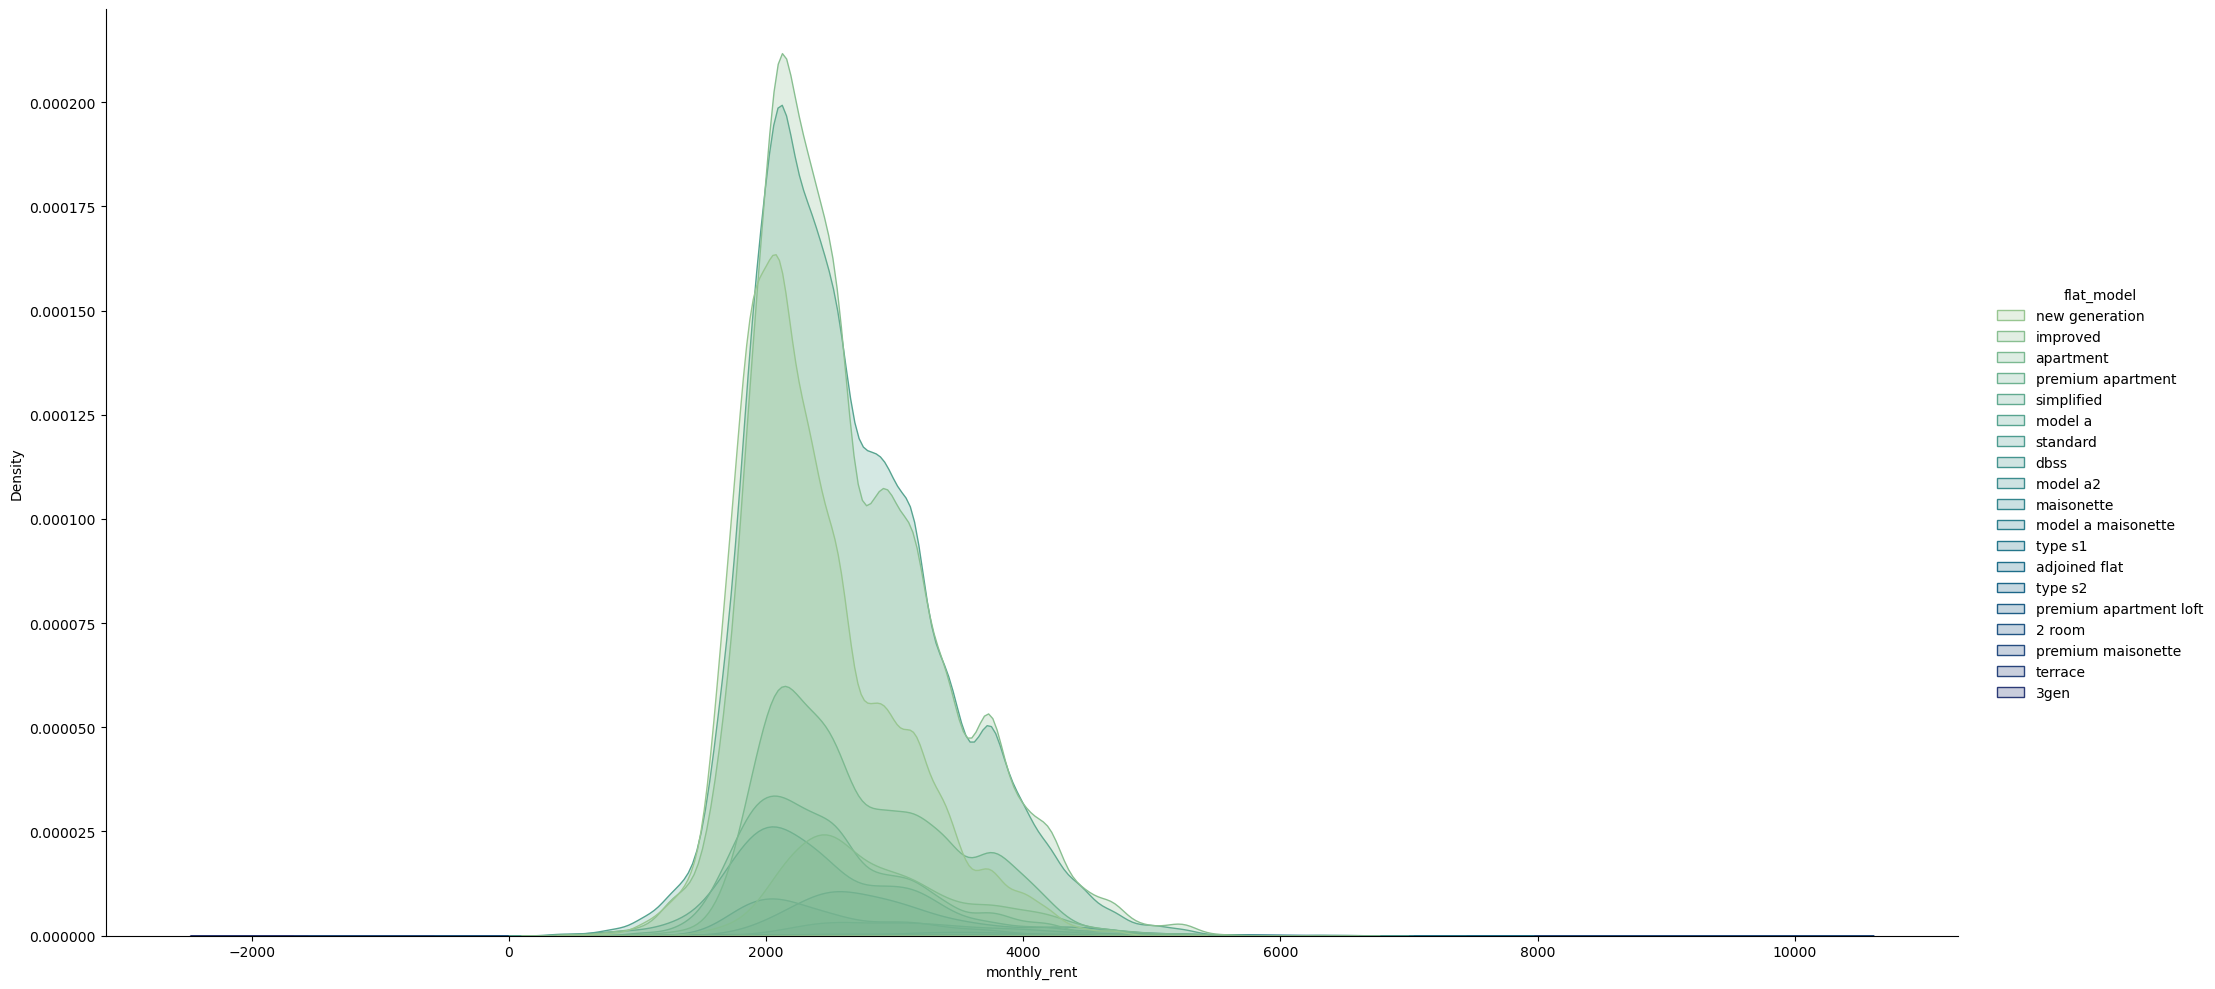

In [ ]:
#distribution of monthly rent via flat model
sns.displot(x='monthly_rent', data=df_train, hue='flat_model', kind='kde', fill=True, palette='crest', height=10, aspect=2)


c:\ProgramData\anaconda3\envs\CS5228\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



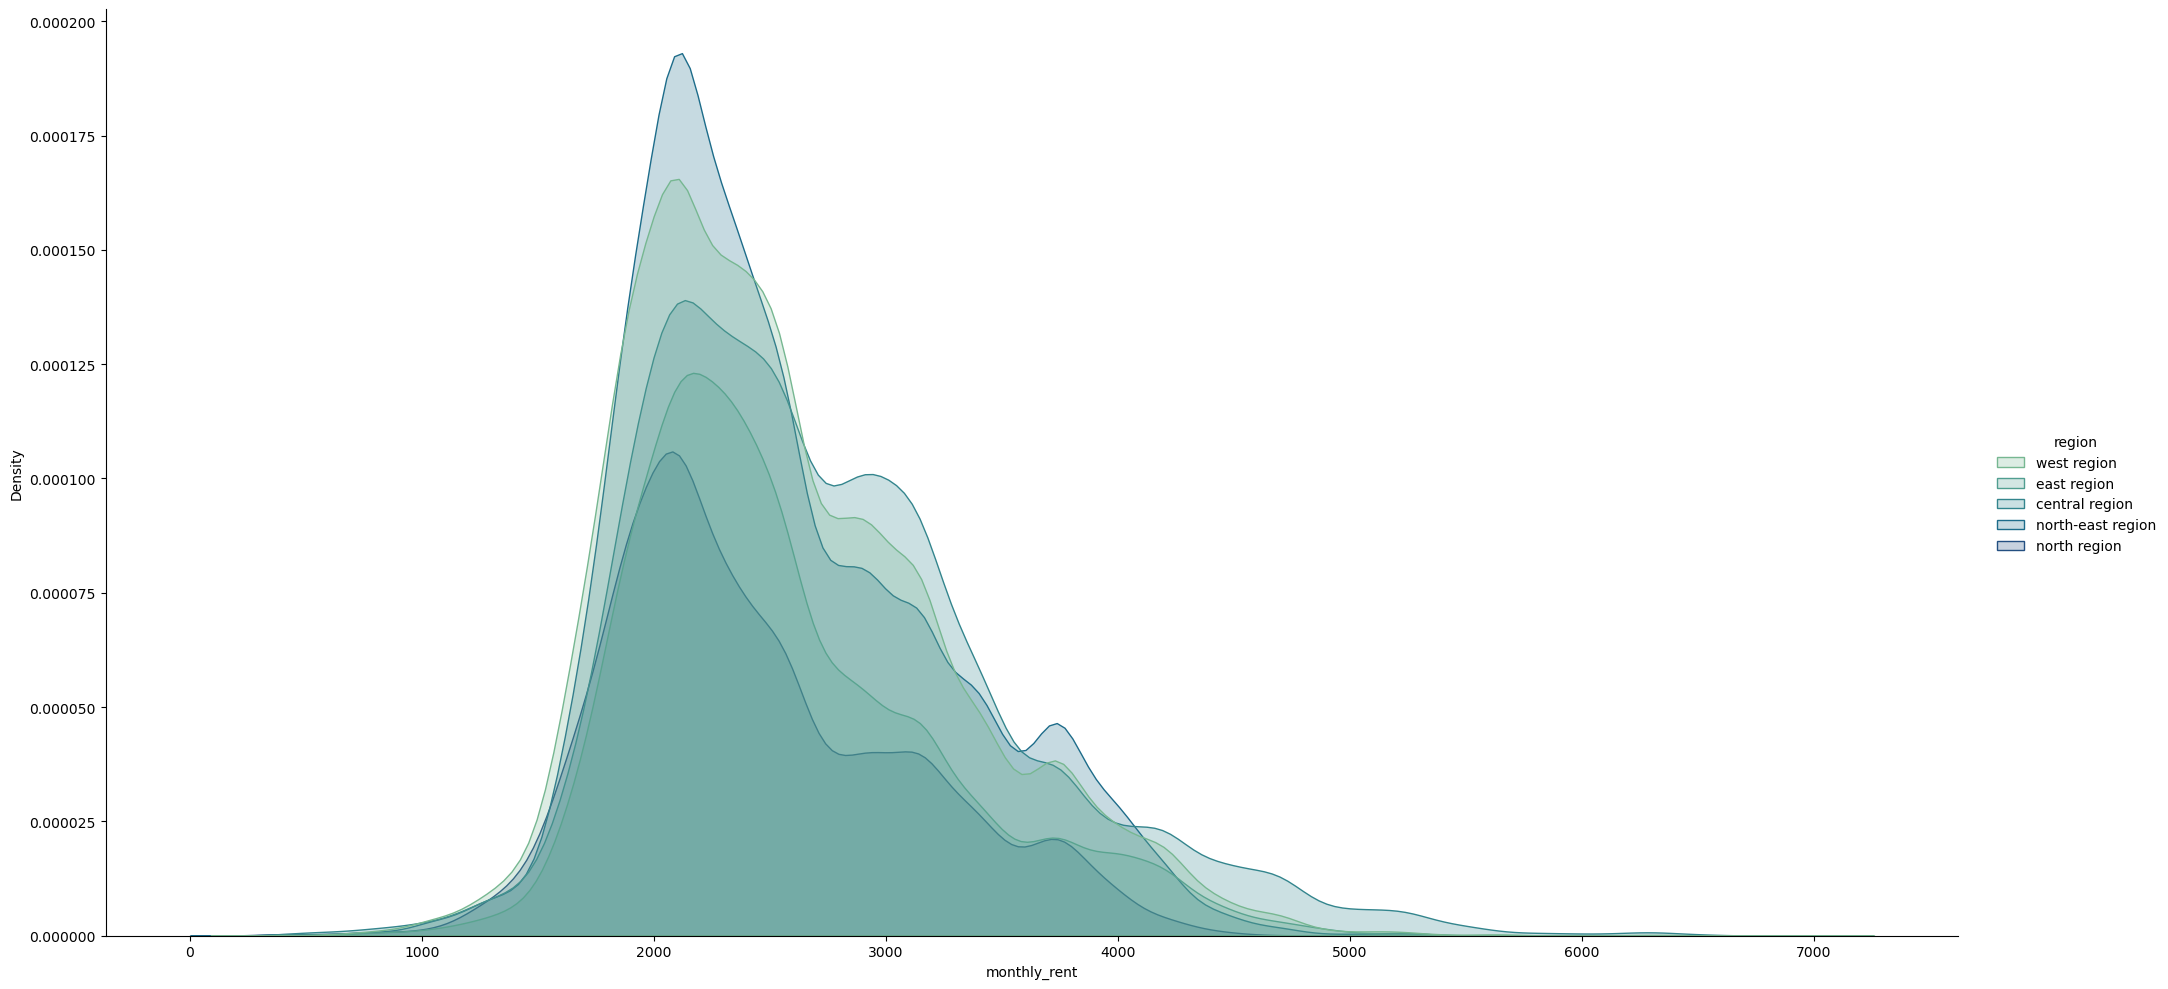

In [ ]:
#distribution of monthly rent via region
sns.displot(x='monthly_rent', data=df_train, hue='region', kind='kde', fill=True, palette='crest', height=10, aspect=2)
